<a href="https://colab.research.google.com/github/josugutierrez2205/ENTREGAS/blob/main/PRACTICA_FINAL_ML_MS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PRACTICA FINAL MACHINE LEARNING: MODELOS SUPERVISADOS**

## HECHO POR: ALICIA GÓMEZ, PABLO BUENAVENTURA Y JOSUÉ GUTIÉRREZ


# Limpieza de datos

En este primer apartado, se cargan los datos y se lleva a cabo una limpieza de las variables con el objetivo de eliminar los valores nulos, seleccionar las variables más relevantes, agrupar valores y categorizar las variables. Estos cambios son necesarios para aplicar posteriormente técnicas de ML

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from google.colab import files
from google.colab import drive
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_curve, auc, roc_auc_score
! pip install category_encoders
import category_encoders as ce
from category_encoders import CatBoostEncoder
from datetime import datetime, date, time, timezone

drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/DATA ML MS FINAL/NCDB_1999_to_2014.csv')
df


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-2-c93b061a7dc7>:22: DtypeWarning: Columns (1,2,5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/DATA ML MS FINAL/NCDB_1999_to_2014.csv')


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,UU,U,UU,2,UU,UU,01,U,U,...,13,07,UUUU,01,M,24,11,1,NN,1
5860401,2014,UU,U,23,2,01,06,05,1,1,...,1,14,2006,01,M,29,96,2,09,5
5860402,2014,UU,U,14,2,01,02,01,1,5,...,1,01,2006,01,F,UU,11,2,01,1
5860403,2014,UU,U,22,1,01,06,01,2,4,...,1,22,UUUU,01,M,67,12,3,01,U


Importamos librerias y cargamos los datos que utilizaremos durante la practica

In [ ]:
pd.set_option('display.max_columns', None)
df

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,3,03,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,3,03,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,3,03,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,6,18,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,6,18,99,NN,NNNN,01,M,05,99,2,UU,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,UU,U,UU,2,UU,UU,01,U,U,U,UU,13,07,UUUU,01,M,24,11,1,NN,1
5860401,2014,UU,U,23,2,01,06,05,1,1,U,18,1,14,2006,01,M,29,96,2,09,5
5860402,2014,UU,U,14,2,01,02,01,1,5,4,18,1,01,2006,01,F,UU,11,2,01,1
5860403,2014,UU,U,22,1,01,06,01,2,4,Q,18,1,22,UUUU,01,M,67,12,3,01,U


Aqui podemos ver algunos valores de cada variable, información que puede ser útil para análisis posteriores

## Tratamiento de las variables

En este segundo apartado se realizan las transformaciones necesarias de las variables para trabajar posteriormente con ellas. Entre los cambios que se han realizado se encuentran: eliminación de valores missing, transformaciones en los tipos de variables, agrupación de valores, eliminación de variables no relevantes, codificación de variables y división de la muestra en train y test

In [ ]:
for col_name in df.columns: 
    print(col_name)

C_YEAR
C_MNTH
C_WDAY
C_HOUR
C_SEV
C_VEHS
C_CONF
C_RCFG
C_WTHR
C_RSUR
C_RALN
C_TRAF
V_ID
V_TYPE
V_YEAR
P_ID
P_SEX
P_AGE
P_PSN
P_ISEV
P_SAFE
P_USER


La función devuelve todas las variables del dataframe

In [ ]:
def missing_summary(dataframe):
    num_elementos = df.shape[0]
    num_missing = df.isna().sum()
    missing_summary = pd.DataFrame(index= df.columns, 
                               data={'total':num_elementos, 
                                     'missing':num_missing,
                                     'missing_rate (%)': round(num_missing/num_elementos * 100,2)})
    return missing_summary

missing_customers = missing_summary(df)
missing_customers

,total,missing,missing_rate (%)
C_YEAR,5860405,0,0.0
C_MNTH,5860405,0,0.0
C_WDAY,5860405,0,0.0
C_HOUR,5860405,0,0.0
C_SEV,5860405,0,0.0
C_VEHS,5860405,3,0.0
C_CONF,5860405,0,0.0
C_RCFG,5860405,0,0.0
C_WTHR,5860405,0,0.0
C_RSUR,5860405,0,0.0


Gracias a esta función podemos ver los valores NA o missing para cada variable

In [ ]:
df.dtypes

C_YEAR     int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
C_SEV      int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
dtype: object

Vemos de que tipo es cada variable

In [ ]:
df= df.replace({'C_WDAY' : {1 : '1', 2: '2', 3 : '3', 4 : '4', 5 : '5', 6 : '6', 7 : '7'}})
df['C_WDAY'].unique()

array(['1', '2', '3', '4', '5', '6', '7', 'U'], dtype=object)

Agrupamos valores que están duplicados

In [ ]:
df.loc[:, 'C_SEV'] = df['C_SEV'].astype('object')

Cambiamos la variable C_SEV a objeto, ya que no la consideramos una variable numérica 

In [ ]:
columnas = ['C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF', 'C_RCFG', 'C_WTHR', 'C_RALN', 'C_TRAF', 'V_TYPE', 'V_YEAR','C_WTHR','P_SEX','P_AGE']

for column in columnas:
    masks = df[column].isin(['U', 'UU','Q','QQ','NN','N','X','XX'])
    df = df[~masks]

df

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
52,1999,1,1,09,2,02,34,02,1,1,1,01,01,01,1992,01,F,33,11,2,02,1
54,1999,1,1,09,2,02,34,02,1,1,1,01,02,01,1992,01,F,70,11,1,02,1
125,1999,1,1,20,2,01,03,03,1,1,3,05,01,01,1988,01,F,38,11,2,02,1
141,1999,1,1,05,2,02,01,02,3,2,4,18,01,06,1995,01,M,34,11,1,02,1
142,1999,1,1,05,2,02,01,02,3,2,4,18,01,06,1995,02,M,30,13,1,02,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860376,2014,12,7,14,2,02,41,01,1,5,1,18,2,05,2008,01,M,44,11,1,02,1
5860377,2014,12,7,14,2,02,41,01,1,5,1,18,2,05,2008,02,M,34,13,2,02,2
5860378,2014,12,7,19,2,01,03,01,1,3,4,18,1,01,2001,01,F,35,11,2,02,1
5860379,2014,12,7,19,2,01,03,01,1,3,4,18,1,01,2001,02,M,26,13,1,02,2


Eliminamos, para algunas variables, los elementos que consideramos que no aportan valor, en este caso los elementos unknown o desconocidos. Cabe señalar que los unknown que no quitamos en otras variables si tienen un significado de valor, que la compañía debería tener en cuenta   

In [ ]:
df['DATE']=pd.to_datetime({'year': df['C_YEAR'],
                           'month': df['C_MNTH'],
                           'day': '1' })

Creamos una nueva variable que guarde la fecha completa

In [ ]:
prop_original = df[['C_SEV', 'P_ISEV']].value_counts() / len(df)
prop_original

C_SEV  P_ISEV
2      2         0.522931
       1         0.422363
       N         0.034104
1      3         0.006682
       2         0.006582
       1         0.003555
2      U         0.003503
1      N         0.000241
       U         0.000038
dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
data, data_reducido = train_test_split(df, test_size=0.025,random_state=0, stratify=df[['C_SEV','P_ISEV']])

In [ ]:
data_reducido

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,DATE
693716,2000,9,2,12,2,02,31,03,1,1,1,01,01,01,1992,01,F,79,11,2,02,1,2000-09-01
4462868,2010,8,4,15,2,01,06,01,1,6,3,18,01,01,2007,03,M,16,23,1,02,2,2010-08-01
1827075,2003,6,1,13,2,02,06,01,1,1,3,18,02,01,1999,01,F,34,11,2,02,1,2003-06-01
5723744,2014,7,6,12,2,2,21,02,2,1,2,01,2,01,2000,01,F,57,11,2,02,1,2014-07-01
2542423,2005,3,6,03,2,01,03,01,1,1,1,18,01,01,1997,02,F,17,23,2,02,2,2005-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625992,2005,6,4,13,2,3,21,01,1,1,1,18,03,01,2005,01,M,20,11,1,UU,1,2005-06-01
3038582,2006,7,4,09,2,02,22,01,1,1,1,18,02,01,1992,01,M,47,11,2,02,1,2006-07-01
5569327,2014,01,2,11,2,02,21,02,1,5,1,01,2,01,2010,01,F,69,11,2,02,1,2014-01-01
684449,2000,8,7,12,2,3,35,02,1,2,2,18,03,14,1981,02,M,59,21,2,09,5,2000-08-01


Reducimos el numero de valores que analizamos debido al alto costo computacional que sería hacer en el analisis de la tabla completa. 

In [ ]:
prop_nueva = data_reducido[['C_SEV', 'P_ISEV']].value_counts() / len(data_reducido)
prop_nueva

C_SEV  P_ISEV
2      2         0.522931
       1         0.422362
       N         0.034102
1      3         0.006685
       2         0.006577
       1         0.003554
2      U         0.003504
1      N         0.000245
       U         0.000039
dtype: float64

In [ ]:
replacement = {'00': '0', '01': '1', '02': '2', '03': '3', '04': '4', '05': '5', '06': '6', '07': '7', '08': '8', '09': '9',
                    '1.0': '1', '2.0': '2', '3.0': '3', '4.0': '4', '5.0': '5'}
data_reducido = data_reducido.replace(replacement)

data_reducido.tail()


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,DATE
2625992,2005,6,4,13,2,3,21,1,1,1,1,18,3,1,2005,1,M,20,11,1,UU,1,2005-06-01
3038582,2006,7,4,9,2,2,22,1,1,1,1,18,2,1,1992,1,M,47,11,2,2,1,2006-07-01
5569327,2014,1,2,11,2,2,21,2,1,5,1,1,2,1,2010,1,F,69,11,2,2,1,2014-01-01
684449,2000,8,7,12,2,3,35,2,1,2,2,18,3,14,1981,2,M,59,21,2,9,5,2000-08-01
3184207,2006,11,5,16,2,2,24,2,1,1,1,18,1,1,1989,1,F,17,11,1,UU,1,2006-11-01


Normalizamos los datos para que podamos trabajar mejor

In [ ]:
data_reducido['C_CONF']=data_reducido['C_CONF'].replace(['1','2','3','4','5','6'],'1')
data_reducido['C_CONF']=data_reducido['C_CONF'].replace(['21','22','23','24','25'],'2')
data_reducido['C_CONF']=data_reducido['C_CONF'].replace(['31','32','33','34','35','36'],'3')
data_reducido['C_CONF']=data_reducido['C_CONF'].replace('41','4')
data_reducido.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,DATE
693716,2000,9,2,12,2,2,3,3,1,1,1,1,1,1,1992,1,F,79,11,2,2,1,2000-09-01
4462868,2010,8,4,15,2,1,1,1,1,6,3,18,1,1,2007,3,M,16,23,1,2,2,2010-08-01
1827075,2003,6,1,13,2,2,1,1,1,1,3,18,2,1,1999,1,F,34,11,2,2,1,2003-06-01
5723744,2014,7,6,12,2,2,2,2,2,1,2,1,2,1,2000,1,F,57,11,2,2,1,2014-07-01
2542423,2005,3,6,3,2,1,1,1,1,1,1,18,1,1,1997,2,F,17,23,2,2,2,2005-03-01


Reducimos y agrupamos el numero de categorías de la variable C_CONFF para poder entender mejor y simplificar las categorias dentro de la variable, para su posterior analisis. Dicha reducción se ha basado en la similaridad entre las características de las categorías

In [ ]:
data_reducido= data_reducido.replace({'C_RCFG' : {'3' : '2','4' : '3', '5' : '4','6' : '5','7' : '6','8' : '7', '9' : '8'}})
data_reducido['C_RCFG']=data_reducido['C_RCFG'].replace(['10','11','12'],'9')

data_reducido.tail()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,DATE
2625992,2005,6,4,13,2,3,2,1,1,1,1,18,3,1,2005,1,M,20,11,1,UU,1,2005-06-01
3038582,2006,7,4,9,2,2,2,1,1,1,1,18,2,1,1992,1,M,47,11,2,2,1,2006-07-01
5569327,2014,1,2,11,2,2,2,2,1,5,1,1,2,1,2010,1,F,69,11,2,2,1,2014-01-01
684449,2000,8,7,12,2,3,3,2,1,2,2,18,3,14,1981,2,M,59,21,2,9,5,2000-08-01
3184207,2006,11,5,16,2,2,2,2,1,1,1,18,1,1,1989,1,F,17,11,1,UU,1,2006-11-01


Reducimos y agrupamos el numero de categorías de la variable C_RCFG para poder entender mejor y simplificar las categorias dentro de la variable, para su posterior analisis. Dicha reducción se ha basado en la similaridad entre las características de las categorías

In [ ]:
data_reducido['P_PSN']=data_reducido['P_PSN'].replace(['12','13'],'12')
data_reducido['P_PSN']=data_reducido['P_PSN'].replace(['21','22','23'],'21')
data_reducido['P_PSN']=data_reducido['P_PSN'].replace(['31','32','33'],'31')

Reducimos y agrupamos el numero de categorías de la variable P_PSN para poder entender mejor y simplificar las categorias dentro de la variable, para su posterior analisis. Dicha reducción se ha basado en la similaridad entre las características de las categorías

In [ ]:
data_reducido['C_HOUR']=data_reducido['C_HOUR'].replace(['0','1','2','3','4','5'],'1')
data_reducido['C_HOUR']=data_reducido['C_HOUR'].replace(['6','7','8','9','10','11','12'],'2')
data_reducido['C_HOUR']=data_reducido['C_HOUR'].replace(['13','14','15','16','17','18','19'],'3')
data_reducido['C_HOUR']=data_reducido['C_HOUR'].replace(['20','21','22','23'],'4')

data_reducido['C_HOUR'].unique()

array(['2', '3', '1', '4'], dtype=object)

Reducimos y agrupamos el numero de categorías de la variable C_HOUR para poder entender mejor y simplificar las categorias dentro de la variable, para su posterior analisis. Dicha reducción se ha basado en la similaridad entre las características de las categorías. En este caso el 1,2,3 y 4 significarían la madrugada, mañana, tarde y noche respectivamente.

In [ ]:
data_reducido.rename(columns={'P_SEX':'MALE?'},
               inplace=True)
data_reducido.columns

Index(['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR', 'P_ID', 'MALE?', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER', 'DATE'],
      dtype='object')

Cambiamos el nombre de la columna P_SEX a MALE? para que tenga sentido el posterior valor que daremos a los valores de la variable

In [ ]:
data_reducido["MALE?"] = data_reducido["MALE?"].replace(
       { 'M': '1', 'F': '0' })
data_reducido.head(30)

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,MALE?,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,DATE
693716,2000,9,2,2,2,2,3,2,1,1,1,1,1,1,1992,1,0,79,11,2,2,1,2000-09-01
4462868,2010,8,4,3,2,1,1,1,1,6,3,18,1,1,2007,3,1,16,21,1,2,2,2010-08-01
1827075,2003,6,1,3,2,2,1,1,1,1,3,18,2,1,1999,1,0,34,11,2,2,1,2003-06-01
5723744,2014,7,6,2,2,2,2,2,2,1,2,1,2,1,2000,1,0,57,11,2,2,1,2014-07-01
2542423,2005,3,6,1,2,1,1,1,1,1,1,18,1,1,1997,2,0,17,21,2,2,2,2005-03-01
5067670,2012,6,6,2,2,2,3,2,1,1,1,3,2,1,2010,2,0,74,12,2,2,2,2012-06-01
2112994,2004,2,1,3,2,1,1,1,7,Q,1,18,1,11,1997,2,1,38,12,1,UU,2,2004-02-01
1097871,2001,8,7,1,1,1,1,1,1,1,3,18,1,1,1989,1,1,18,11,2,2,1,2001-08-01
538889,2000,5,1,4,2,2,3,2,1,1,1,1,2,1,1993,3,1,24,21,2,1,2,2000-05-01
129905,1999,5,3,1,2,1,1,2,1,1,1,3,1,1,1992,1,1,42,11,2,9,1,1999-05-01


A continuación, cambiamos los valores de la variable MALE? para que sean números, con el objetivo de conseguir que todos los datos del dataframe sean numéricos. 

Cabe señalar que realmente son caracteres, ya que no tendría sentido que fuesen números porque las variables son categóricas, y las categorías dentro de las variables no son cuantificables en general sino que son cualitativas 



In [ ]:
data_reducido.rename(columns={'C_SEV':'FATALITY'},
               inplace=True)
data_reducido.columns

Index(['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'FATALITY', 'C_VEHS', 'C_CONF',
       'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE',
       'V_YEAR', 'P_ID', 'MALE?', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE',
       'P_USER', 'DATE'],
      dtype='object')

También cambiamos el nombre de la variable a FATALITY, ya que si analizamos los valores nos daremos cuenta de que eso es al final lo que indica.

In [ ]:
data_reducido['FATALITY'] = data_reducido['FATALITY'].astype(str).replace(
       { '1': 1, '2': 0 }).astype('int')
data_reducido.tail

<bound method NDFrame.tail of          C_YEAR C_MNTH C_WDAY C_HOUR  FATALITY C_VEHS C_CONF C_RCFG C_WTHR  \
693716     2000      9      2      2         0      2      3      2      1   
4462868    2010      8      4      3         0      1      1      1      1   
1827075    2003      6      1      3         0      2      1      1      1   
5723744    2014      7      6      2         0      2      2      2      2   
2542423    2005      3      6      1         0      1      1      1      1   
...         ...    ...    ...    ...       ...    ...    ...    ...    ...   
2625992    2005      6      4      3         0      3      2      1      1   
3038582    2006      7      4      2         0      2      2      1      1   
5569327    2014      1      2      2         0      2      2      2      1   
684449     2000      8      7      2         0      3      3      2      1   
3184207    2006     11      5      3         0      2      2      2      1   

        C_RSUR C_RALN C_TRAF V_ID

Cambiamos los valores dentro de la variable FATALITY y la convertimos a numérica. Indicando con el 1 un accidente muy grave con algún muerto, y 0 un accidente menos grave sin muertos

In [ ]:
data_reducido = data_reducido.set_index('DATE')

In [ ]:
data_reducido = data_reducido.drop(['C_YEAR','C_MNTH'], axis=1)

Fijamos la variable DATE como índice del dataframe

------
------
------
------


---
----
----

In [ ]:
df_target=data_reducido.loc[:,['FATALITY']]

In [ ]:
df_features = data_reducido.drop('FATALITY', axis=1)

df_features.columns

Index(['C_WDAY', 'C_HOUR', 'C_VEHS', 'C_CONF', 'C_RCFG', 'C_WTHR', 'C_RSUR',
       'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE', 'V_YEAR', 'P_ID', 'MALE?',
       'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE', 'P_USER'],
      dtype='object')

In [ ]:
cbe = ce.CatBoostEncoder(cols=df_features.columns)
categoricas_transformed= cbe.fit_transform(df_features,df_target)
categoricas_transformed

,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,MALE?,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
DATE,,,,,,,,,,,,,,,,,,,
2000-09-01,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100
2010-08-01,0.017100,0.017100,0.017100,0.017100,0.017100,0.008550,0.017100,0.017100,0.017100,0.008550,0.008550,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.008550,0.017100
2003-06-01,0.017100,0.008550,0.008550,0.008550,0.008550,0.005700,0.008550,0.008550,0.008550,0.017100,0.005700,0.017100,0.008550,0.008550,0.017100,0.008550,0.008550,0.005700,0.008550
2014-07-01,0.017100,0.008550,0.005700,0.017100,0.008550,0.017100,0.005700,0.017100,0.008550,0.008550,0.004275,0.017100,0.005700,0.005700,0.017100,0.005700,0.005700,0.004275,0.005700
2005-03-01,0.008550,0.017100,0.008550,0.005700,0.005700,0.004275,0.004275,0.008550,0.005700,0.005700,0.003420,0.017100,0.017100,0.004275,0.017100,0.008550,0.004275,0.003420,0.008550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-06-01,0.016208,0.014888,0.013783,0.006266,0.028826,0.016701,0.017478,0.013727,0.025221,0.015760,0.014831,0.015389,0.015660,0.020851,0.018021,0.015626,0.008344,0.021296,0.015058
2006-07-01,0.016207,0.014707,0.014085,0.006266,0.028826,0.016700,0.017478,0.013727,0.025220,0.014548,0.014831,0.013661,0.015660,0.020850,0.017165,0.015626,0.012422,0.013010,0.015058
2014-01-01,0.015869,0.014707,0.014085,0.006266,0.008962,0.016700,0.020302,0.013726,0.003931,0.014547,0.014830,0.010117,0.015660,0.012231,0.023891,0.015626,0.012422,0.013010,0.015057


Utilizamos CatboostEncoder para transformar las variables categóricas a númericas. Al utilizar este método se evita el sobreajuste, ya que el proceso de codificación de categorías para los datos de entrenamiento se repite varias veces en versiones barajadas del conjunto de datos y los resultados se promedian.

In [ ]:
lista_transformed= list(categoricas_transformed.columns)
lista_transformed

['C_WDAY',
 'C_HOUR',
 'C_VEHS',
 'C_CONF',
 'C_RCFG',
 'C_WTHR',
 'C_RSUR',
 'C_RALN',
 'C_TRAF',
 'V_ID',
 'V_TYPE',
 'V_YEAR',
 'P_ID',
 'MALE?',
 'P_AGE',
 'P_PSN',
 'P_ISEV',
 'P_SAFE',
 'P_USER']

In [ ]:
df_def = data_reducido.copy()

df_def.loc[:, lista_transformed] = categoricas_transformed.loc[:, lista_transformed]
df_def

<ipython-input-30-0e1da9404728>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_def.loc[:, lista_transformed] = categoricas_transformed.loc[:, lista_transformed]


,C_WDAY,C_HOUR,FATALITY,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,MALE?,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
DATE,,,,,,,,,,,,,,,,,,,,
2000-09-01,0.017100,0.017100,0,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100
2010-08-01,0.017100,0.017100,0,0.017100,0.017100,0.017100,0.008550,0.017100,0.017100,0.017100,0.008550,0.008550,0.017100,0.017100,0.017100,0.017100,0.017100,0.017100,0.008550,0.017100
2003-06-01,0.017100,0.008550,0,0.008550,0.008550,0.008550,0.005700,0.008550,0.008550,0.008550,0.017100,0.005700,0.017100,0.008550,0.008550,0.017100,0.008550,0.008550,0.005700,0.008550
2014-07-01,0.017100,0.008550,0,0.005700,0.017100,0.008550,0.017100,0.005700,0.017100,0.008550,0.008550,0.004275,0.017100,0.005700,0.005700,0.017100,0.005700,0.005700,0.004275,0.005700
2005-03-01,0.008550,0.017100,0,0.008550,0.005700,0.005700,0.004275,0.004275,0.008550,0.005700,0.005700,0.003420,0.017100,0.017100,0.004275,0.017100,0.008550,0.004275,0.003420,0.008550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-06-01,0.016208,0.014888,0,0.013783,0.006266,0.028826,0.016701,0.017478,0.013727,0.025221,0.015760,0.014831,0.015389,0.015660,0.020851,0.018021,0.015626,0.008344,0.021296,0.015058
2006-07-01,0.016207,0.014707,0,0.014085,0.006266,0.028826,0.016700,0.017478,0.013727,0.025220,0.014548,0.014831,0.013661,0.015660,0.020850,0.017165,0.015626,0.012422,0.013010,0.015058
2014-01-01,0.015869,0.014707,0,0.014085,0.006266,0.008962,0.016700,0.020302,0.013726,0.003931,0.014547,0.014830,0.010117,0.015660,0.012231,0.023891,0.015626,0.012422,0.013010,0.015057


In [ ]:
train, test = train_test_split(df_def, test_size=0.3,random_state=0, stratify= df_def[['FATALITY']])

Dividimos el dataframe en datos train y test

In [ ]:
print("The data set train has",train.shape[0], "rows and the test has", test.shape[0], "rows.""If we add both i get the shape of the original data set", df_def.shape[0])


The data set train has 71309 rows and the test has 30561 rows.If we add both i get the shape of the original data set 101870


# Análisis descriptivo

En este segundo apartado se realiza un análisis exploratorio de los datos. Empezando por un análisis de correlación, seguido del estudio de la distribución de la variable objetivo y, por último, un análisis del impacto en la mortalidad de variables como el clima, la configuración de la carretera y la edad de los fallecidos.

C_WDAY      float64
C_HOUR      float64
FATALITY      int64
C_VEHS      float64
C_CONF      float64
C_RCFG      float64
C_WTHR      float64
C_RSUR      float64
C_RALN      float64
C_TRAF      float64
V_ID        float64
V_TYPE      float64
V_YEAR      float64
P_ID        float64
MALE?       float64
P_AGE       float64
P_PSN       float64
P_ISEV      float64
P_SAFE      float64
P_USER      float64
dtype: object


<Axes: >

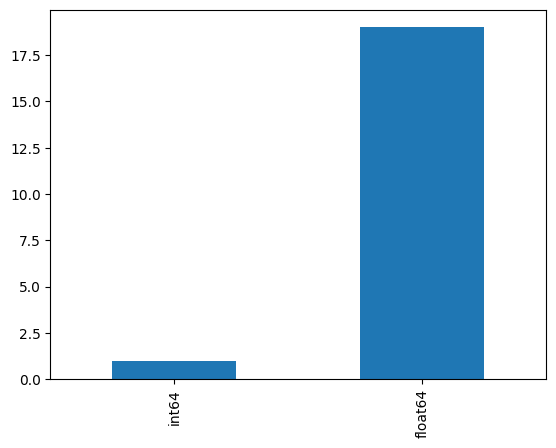

In [ ]:
df_types = df_def.dtypes
print(df_types)
df_types.groupby(df_types.values).count().plot.bar()

Podemos ver el tipo definitivo de las variables tras haber realizado las transformaciones oportunas

### Análisis de la correlación de las variables continuas

In [ ]:
continuas = pd.DataFrame(df_def.drop('FATALITY',axis=1))
x = continuas.corr()
x.style.background_gradient(cmap='coolwarm')

,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,MALE?,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
C_WDAY,1.000000,0.147945,0.037393,0.055287,0.040762,0.052008,0.020623,0.046051,0.034387,0.054266,-0.006206,0.040101,0.032524,0.051756,-0.003350,0.036979,0.005230,0.030931,0.068491
C_HOUR,0.147945,1.000000,0.161633,0.182494,0.091541,0.048772,0.033613,0.093963,0.061497,0.067760,0.021066,0.009704,0.025233,0.113003,-0.000847,0.022406,0.036313,0.092051,0.041299
C_VEHS,0.037393,0.161633,1.000000,0.458586,0.241818,0.078067,0.088503,0.181317,0.192836,0.151207,0.043207,-0.000477,0.022648,0.051760,0.006955,0.035265,0.033502,0.081504,0.055437
C_CONF,0.055287,0.182494,0.458586,1.000000,0.028911,0.071715,0.078036,0.183898,0.089539,0.108396,0.029275,0.016679,0.019450,0.049688,0.026542,0.028183,0.059342,0.118727,0.054510
C_RCFG,0.040762,0.091541,0.241818,0.028911,1.000000,0.115536,0.094347,0.182827,0.543047,0.054289,0.073554,-0.001148,0.018641,0.043833,-0.009855,0.026157,0.048930,0.050737,0.045558
C_WTHR,0.052008,0.048772,0.078067,0.071715,0.115536,1.000000,0.298645,0.064465,0.104936,0.095968,0.062124,0.005834,0.043056,0.090658,0.006795,0.047090,0.010318,0.027246,0.069559
C_RSUR,0.020623,0.033613,0.088503,0.078036,0.094347,0.298645,1.000000,0.047894,0.093611,0.055027,0.048240,0.017788,0.035879,0.064534,0.002929,0.043098,0.016689,0.048253,0.067646
C_RALN,0.046051,0.093963,0.181317,0.183898,0.182827,0.064465,0.047894,1.000000,0.180266,0.054167,0.048574,0.008730,0.014414,0.031941,0.012994,0.009645,0.043972,0.054040,0.047345
C_TRAF,0.034387,0.061497,0.192836,0.089539,0.543047,0.104936,0.093611,0.180266,1.000000,0.052652,0.069196,0.012380,0.020205,0.042551,0.004770,0.031059,0.049158,0.062992,0.055983
V_ID,0.054266,0.067760,0.151207,0.108396,0.054289,0.095968,0.055027,0.054167,0.052652,1.000000,0.023609,0.007048,0.024943,0.067107,0.015183,0.026905,0.009769,0.025246,0.049835


Gracias al mapa de correlación, podemos identificar las variables que más y menos se relacionan entre sí. Destaca la fuerte correlación positiva entre las variables P_USER y P_PSN, ya que la posición del accidentando en el vehículo guarda relación con la clase de usuario de la carretera. Del mismo modo se relacionan el control del tráfico  (C_TRAF) y la configuración de la carretera (C_RCFG) por las normas de tráfico.

## Distribución de la variable objetivo

Nuestra variable objetivo es el grado de fatalidad de la colosión; es decir, si el accidente ha provocado el fallecimiento de algún usuario implicado o no

In [ ]:
distribucion = data_reducido['FATALITY'].value_counts()
distribucion

0    100128
1      1742
Name: FATALITY, dtype: int64

Esta variable toma dos valores: 0 si no ha provocado la muerte de ningún usario, y, 1 si ha fallecido por lo menos un usuario

In [ ]:
pd_plot_fatality = data_reducido['FATALITY']\
        .value_counts(normalize=True)\
        .mul(100).rename('percent').reset_index()

pd_plot_fatality_conteo = data_reducido['FATALITY'].value_counts().reset_index()
pd_plot_fatality_pc = pd.merge(pd_plot_fatality, pd_plot_fatality_conteo, on=['index'], how='inner')
pd_plot_fatality_pc

,index,percent,FATALITY
0,0,98.289977,100128
1,1,1.710023,1742


Vemos que sólo en el 1.74% de los accidentes, ha fallecido algún implicado

In [ ]:
fig = px.histogram(pd_plot_fatality_pc, x="index", y=['percent'])
fig.show()

## Relación número de accidentes con días de la semana y horas del día

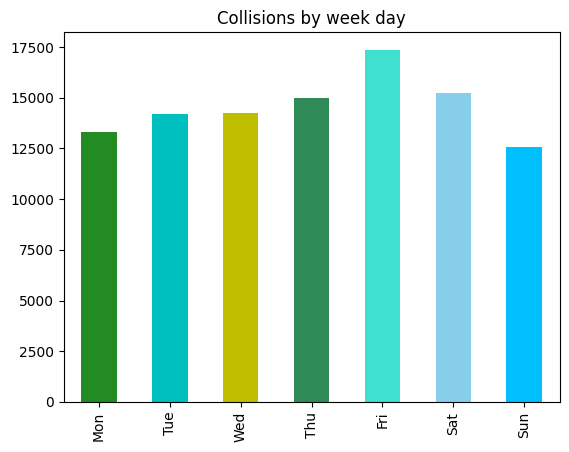

In [ ]:
by_weekday = data_reducido.groupby('C_WDAY')['FATALITY'].count()
by_weekday.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plot2 = by_weekday.plot(kind='bar',title='Collisions by week day',color= ['forestgreen','c','y','seagreen','turquoise','skyblue','deepskyblue']);

Podemos ver como los fin de semana se producen más accidentes que los días de diarios, especialmente los viernes y sábados

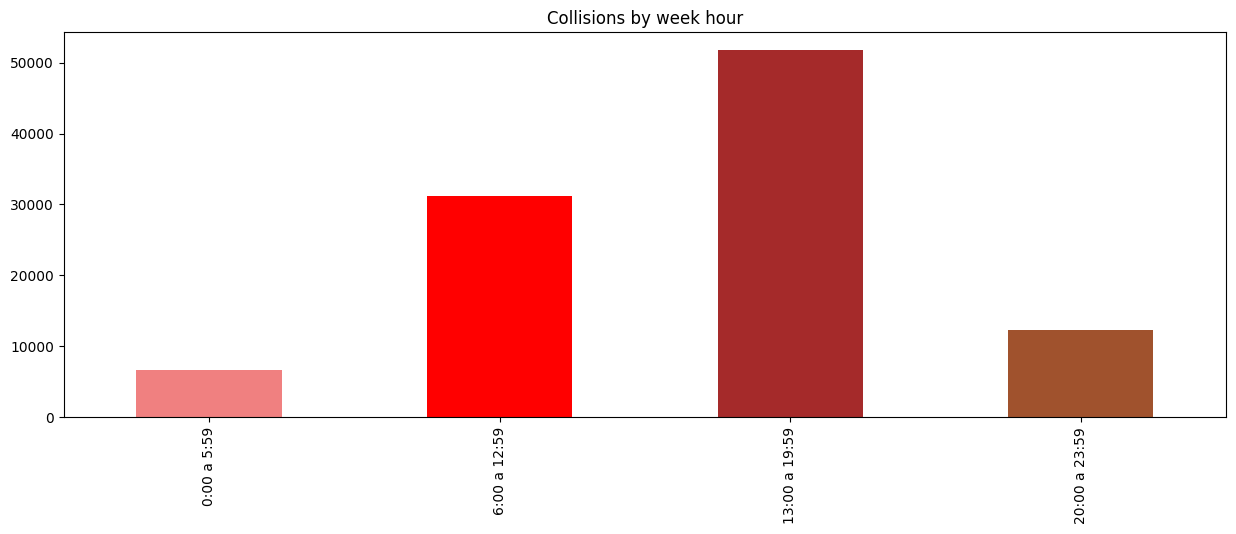

In [ ]:
plt.figure(figsize=(15,5))
by_hour = data_reducido.groupby('C_HOUR')['FATALITY'].count()
by_hour.index = ['0:00 a 5:59', '6:00 a 12:59', '13:00 a 19:59', '20:00 a 23:59']
plot3 = by_hour.plot(kind='bar',title='Collisions by week hour',color=['lightcoral','r','brown','sienna']);

La mayoría de los accidentes suceden entre la 1 y las 8 de la tarde. Las horas más tranquilas son por la noche y por la madrugada. Estas horas del día suelen ser las más peligrosas para conducir por tanto los conductores evitan hacerlo, motivo por el que ocurren menos accidentes. No obstante, por la tarde tienden a confiarse más y estar menos atentos a la carretera. La mayoría de accidentes ocurren por despistes de los conductores.

## Relación mortalidad con el clima

In [ ]:
def frecuencia(columna, tipos, titulo, data):
    analysis = data_reducido.groupby(columna)["FATALITY"].count()
    plt.figure(figsize=(15, 5))
    plot = analysis.plot(kind="bar", title=titulo, color="#639A88")
    plot.set_xticklabels(tipos, rotation=45)

In [ ]:
def mortalidad(columna, tipos, titulo, data):
    analysis = data_reducido.groupby([columna, "FATALITY"]).size()
    serie = list()
    for i in range(0, np.int8(len(analysis) / 2)):
        serie.append(analysis[:, 1].iloc[[i]].item() / (
                    analysis[:, 1].iloc[[i]].item() + (analysis[:, 0].iloc[[i]].item())) * 100)
    analysis = pd.Series(serie, index=range(0, np.int8(len(analysis) / 2)))
    plt.figure(figsize=(15, 5))
    plot = analysis.plot(kind="bar", title=titulo, color="#3A5683")
    plot.set_xticklabels(tipos, rotation=45)

In [ ]:
def mortalidadtotal(columna, tipos, titulo, data):
    analysis = data_reducido.groupby(columna)["FATALITY"].sum() / data_reducido["FATALITY"].sum() * 100
    plt.figure(figsize=(15, 5))
    plot = analysis.plot(kind="bar", title=titulo, color="#76B041")
    plot.set_xticklabels(tipos, rotation=45)

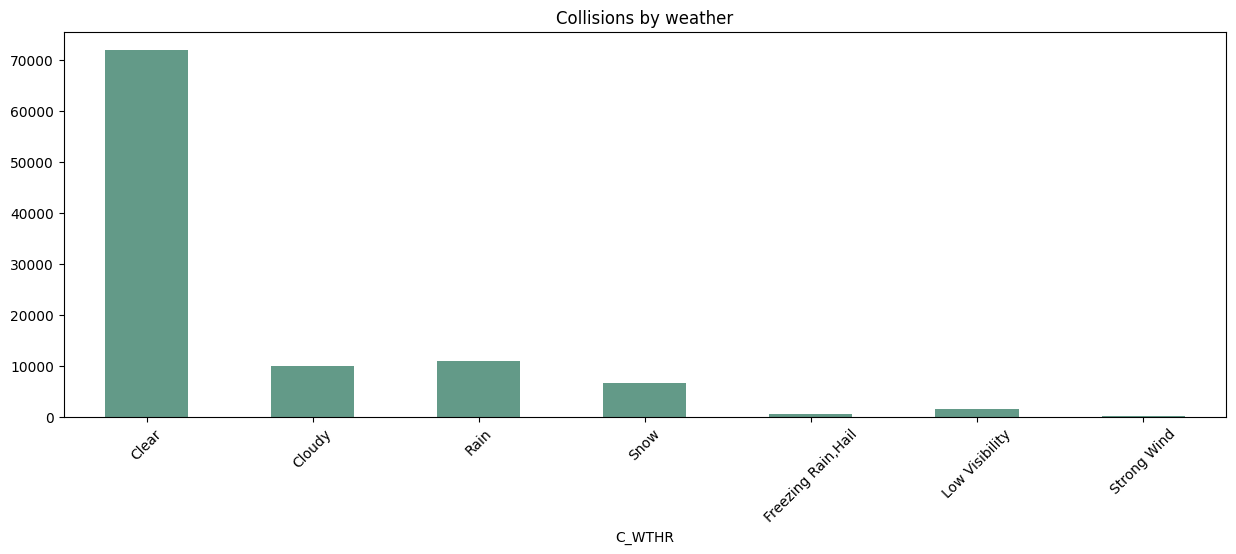

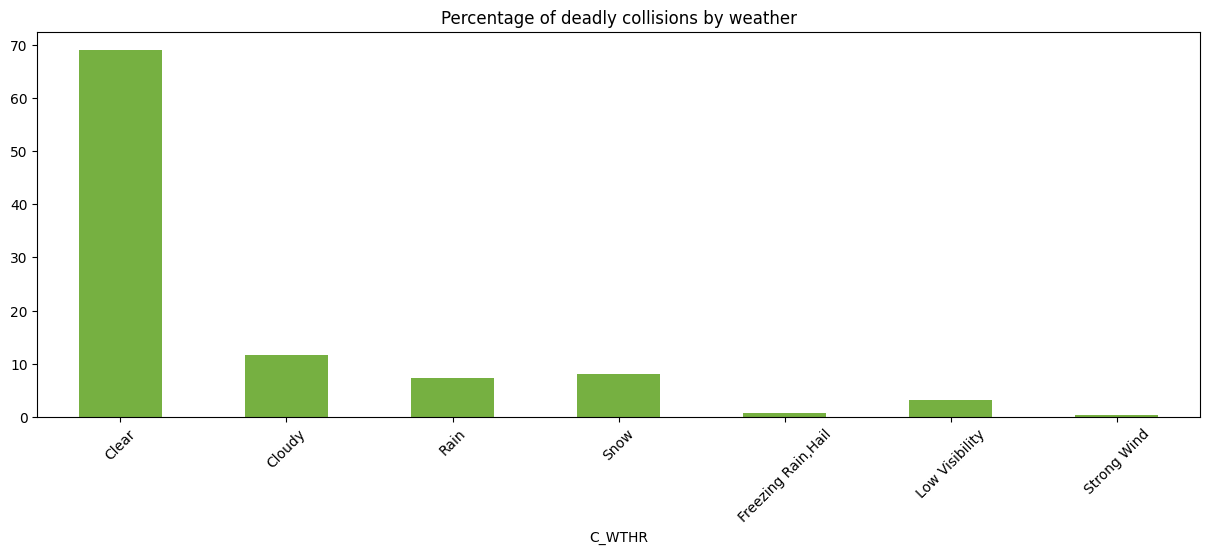

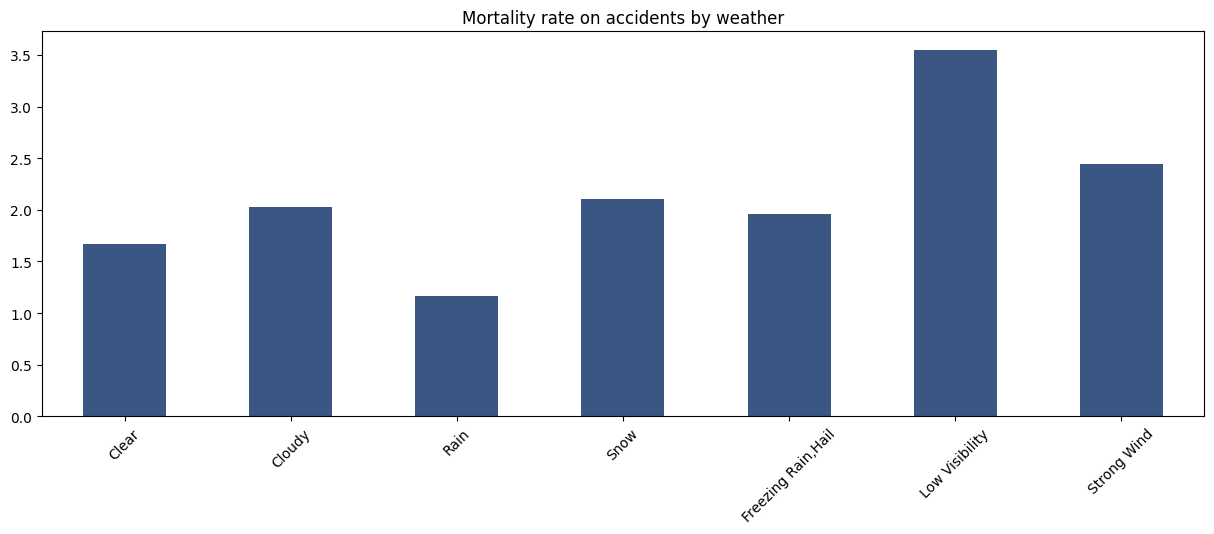

In [ ]:
tipos = ['Clear','Cloudy','Rain','Snow','Freezing Rain,Hail',
                'Low Visibility','Strong Wind']
frecuencia("C_WTHR", tipos, "Collisions by weather",data_reducido)
mortalidadtotal("C_WTHR", tipos, "Percentage of deadly collisions by weather",data_reducido)
mortalidad("C_WTHR", tipos, "Mortality rate on accidents by weather",data_reducido)

Llegamos a la conclusión de que la mayoría de accidentes ocurren los días soleados y despejados. Esto se explica por el exceso de confianza de los conductores.

No obstante, los accidentes con mayor tasa de mortalidad ocurren en momentos de baja visibilidad, debido a la dificultad que supone conducir bajo esas condiciones climáticas.

## Evolución temporal de los accidentes

Text(0, 0.5, 'Number of deadly colissions')

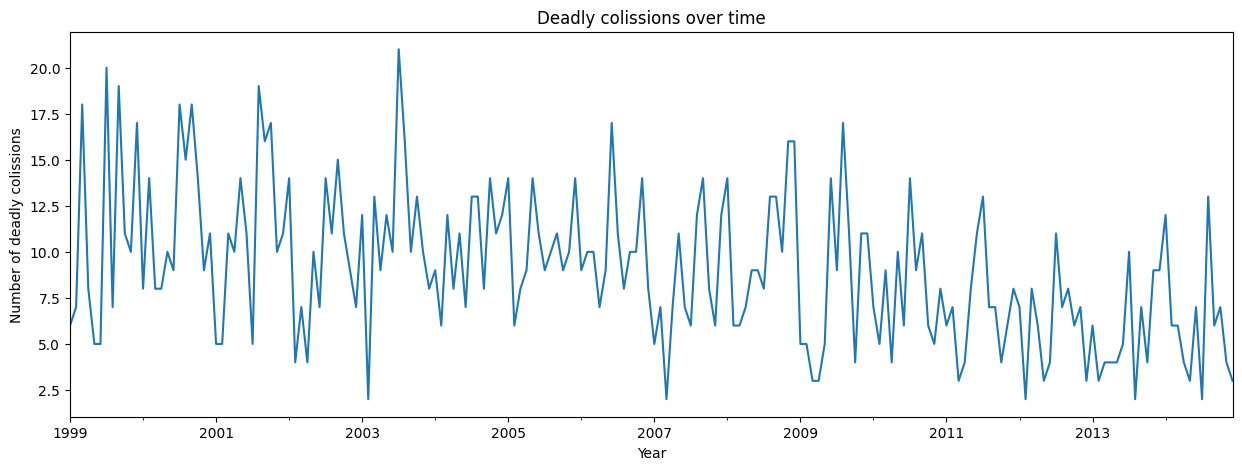

In [ ]:
time_collision_both = data_reducido.groupby('DATE')["FATALITY"].sum()
plot = time_collision_both.plot(figsize = (15,5), title = "Deadly colissions over time")
plot.set_xlabel("Year")
plot.set_ylabel("Number of deadly colissions")

No se observa una tendencia muy clara pero los accidentes se reducen con el paso de los años. Esto se explica por los sistemas de seguridad cada vez más modernos que desarrollan los ingenieros.

## Relación mortalidad con la configuración de la carretera

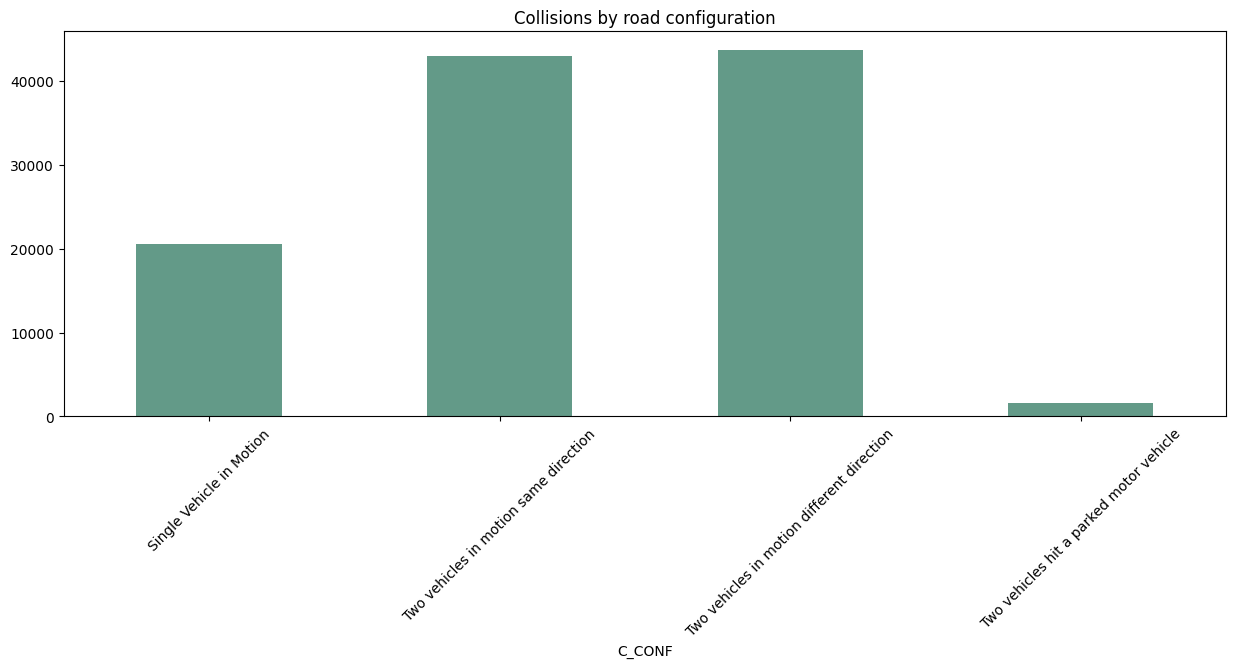

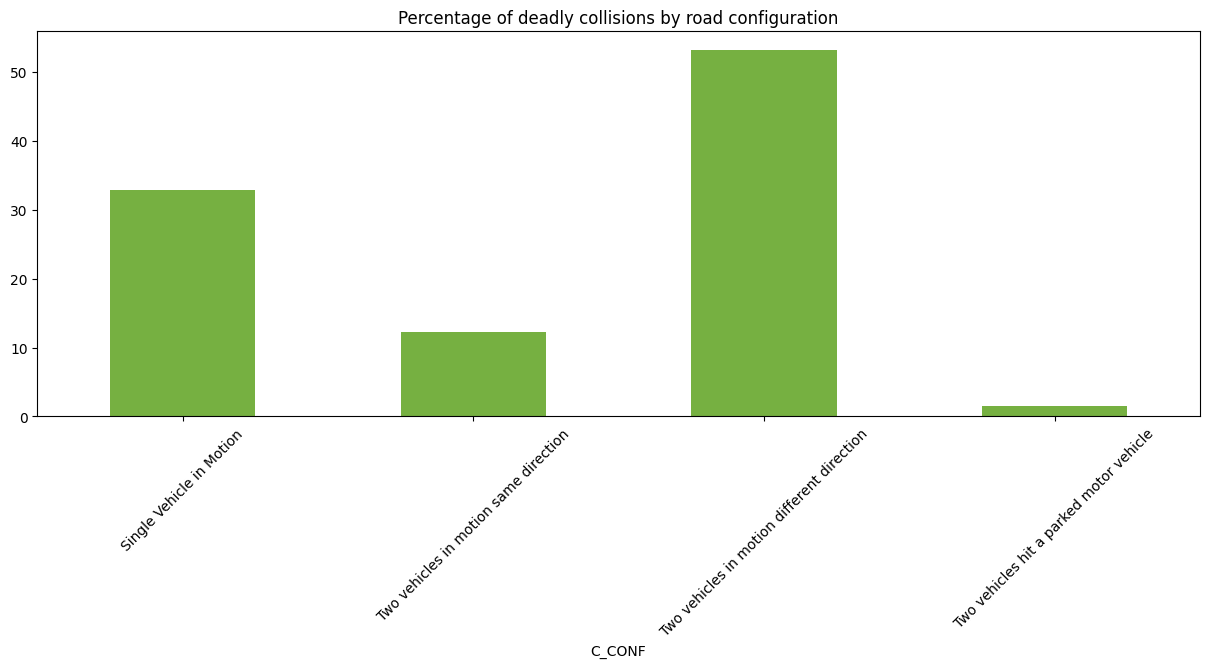

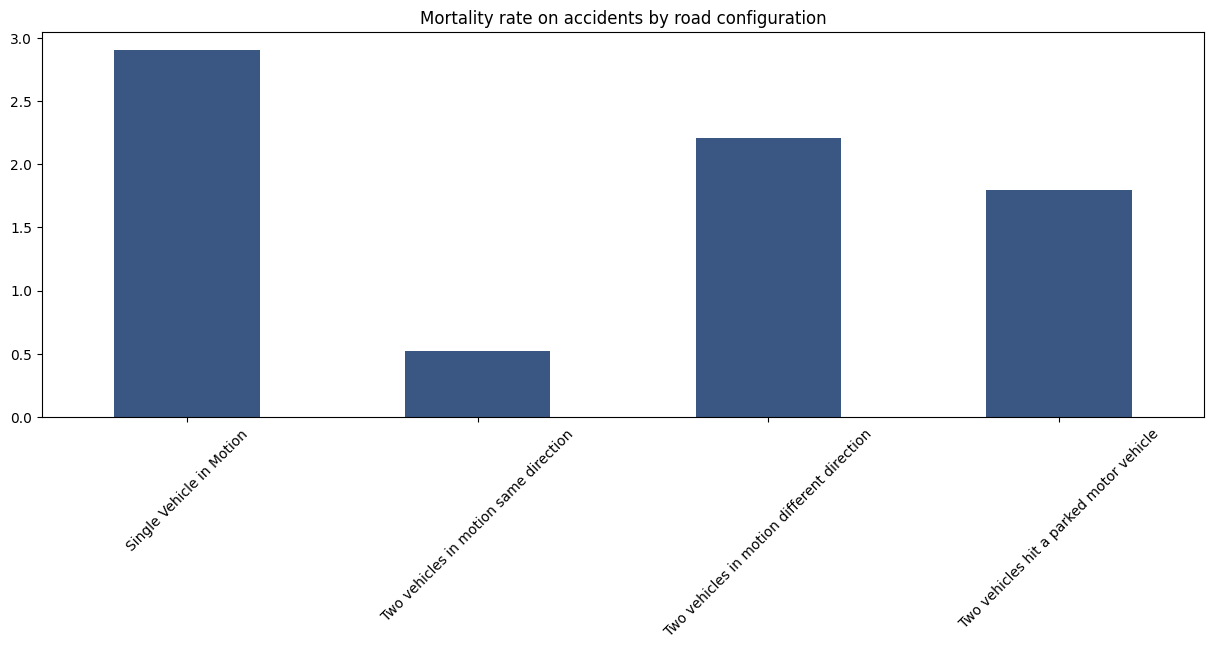

In [ ]:
tipos = ['Single Vehicle in Motion','Two vehicles in motion same direction','Two vehicles in motion different direction','Two vehicles hit a parked motor vehicle']

frecuencia("C_CONF", tipos, "Collisions by road configuration", data_reducido)
mortalidadtotal("C_CONF", tipos, "Percentage of deadly collisions by road configuration", data_reducido)
mortalidad("C_CONF", tipos, "Mortality rate on accidents by road configuration", data_reducido)

Podemos ver que la mayoría de accidentes que se producen son entre doss coches en movimiento. No obstante, los más mortales son los que ocurren en un sólo vehículo en movimiento.

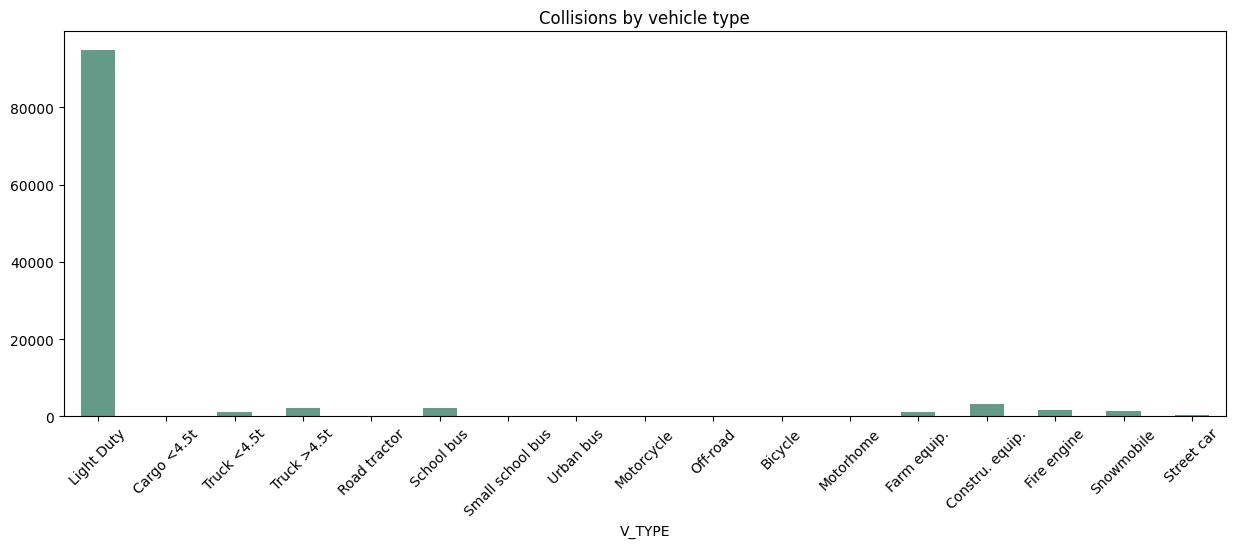

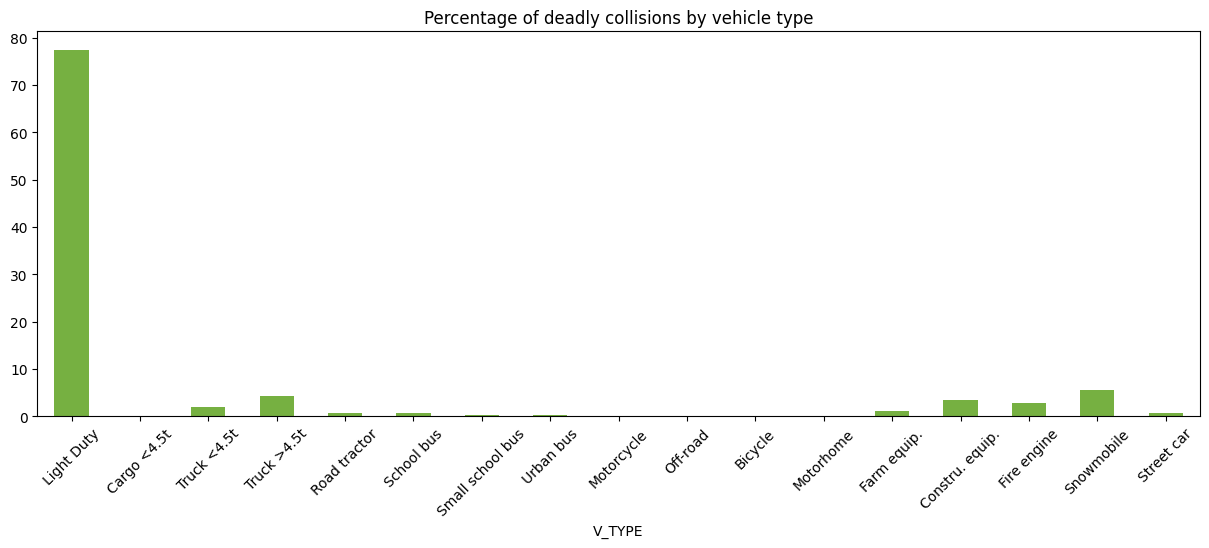

In [ ]:
tipos = ['Light Duty', 'Cargo <4.5t', 'Truck <4.5t',
          'Truck >4.5t', 'Road tractor', 'School bus',
          'Small school bus', 'Urban bus', 'Motorcycle',
          'Off-road', 'Bicycle', 'Motorhome', 'Farm equip.',
          'Constru. equip.', 'Fire engine', 'Snowmobile',
          'Street car']
             
frecuencia("V_TYPE", tipos, "Collisions by vehicle type",data_reducido)
mortalidadtotal("V_TYPE", tipos, "Percentage of deadly collisions by vehicle type",data_reducido)

Sin lugar a dudas, el vehículo en el que se cometen más accidentes es el vehículo ligero. Hay que tener en cuenta que es el vehículo más utilizado: a mayor exposición al peligro, más probabilidad de accidente.

In [ ]:
data_reducido['MALE?'].value_counts()

1    57555
0    44315
Name: MALE?, dtype: int64

## Relación mortalidad con el sexo y la edad del accidentado

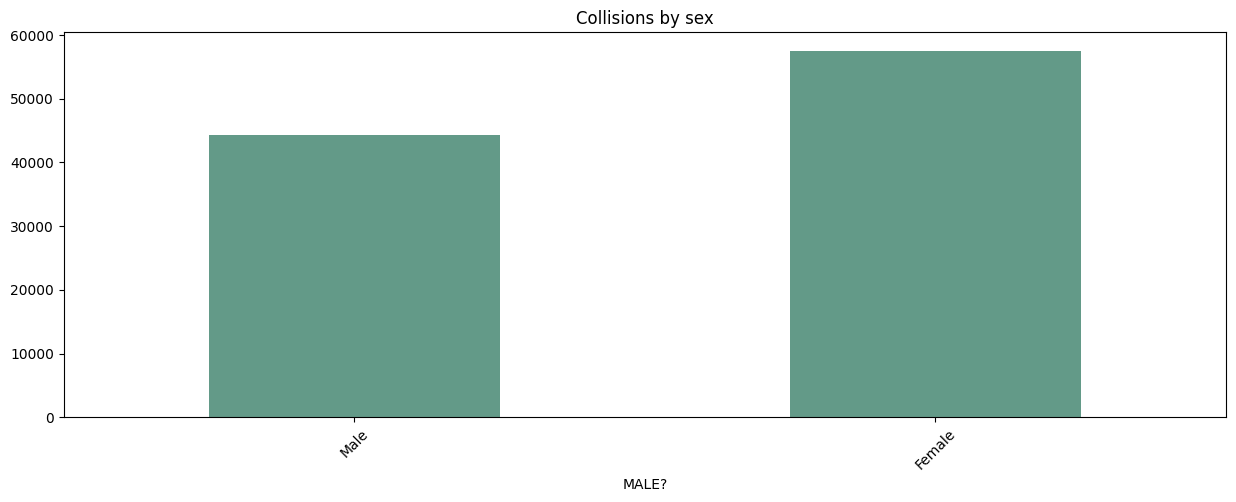

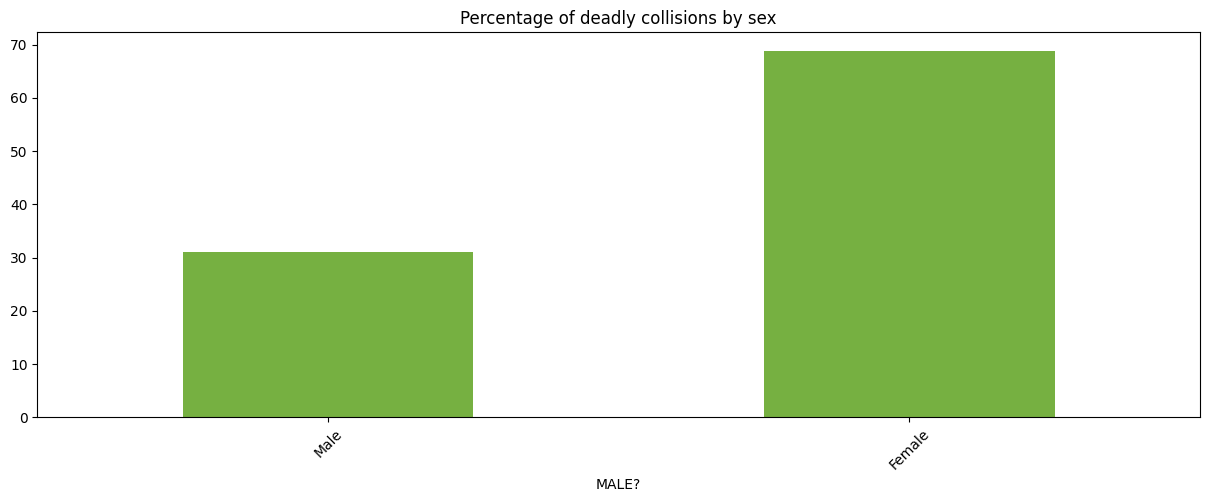

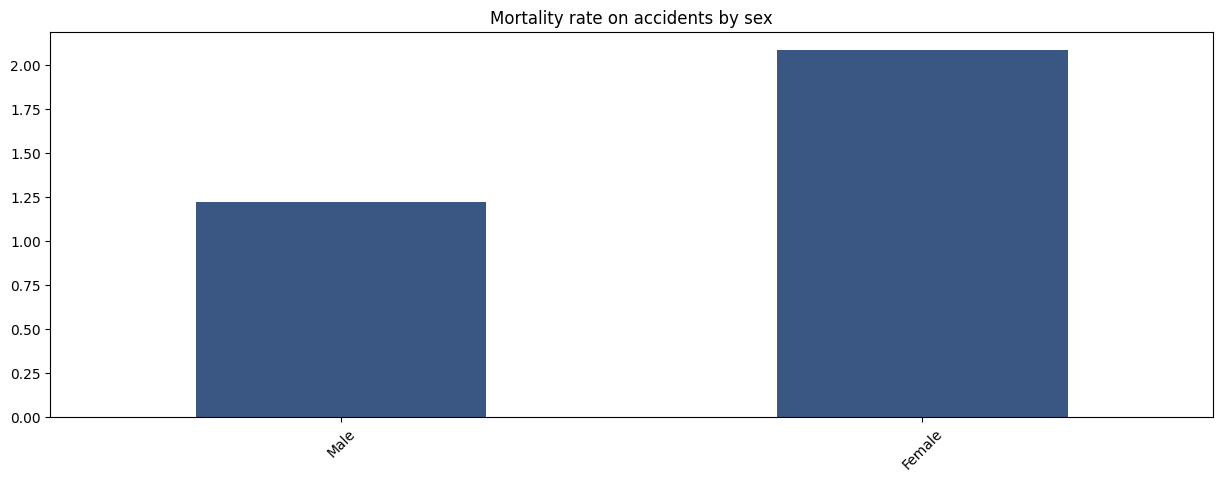

In [ ]:
tipos = ["Male", "Female"]
frecuencia("MALE?", tipos, "Collisions by sex", data_reducido)
mortalidadtotal("MALE?", tipos, "Percentage of deadly collisions by sex", data_reducido)
mortalidad("MALE?", tipos, "Mortality rate on accidents by sex", data_reducido)

Las mujeres son más propensas que los hombres a tener accidentes y a morir por ello

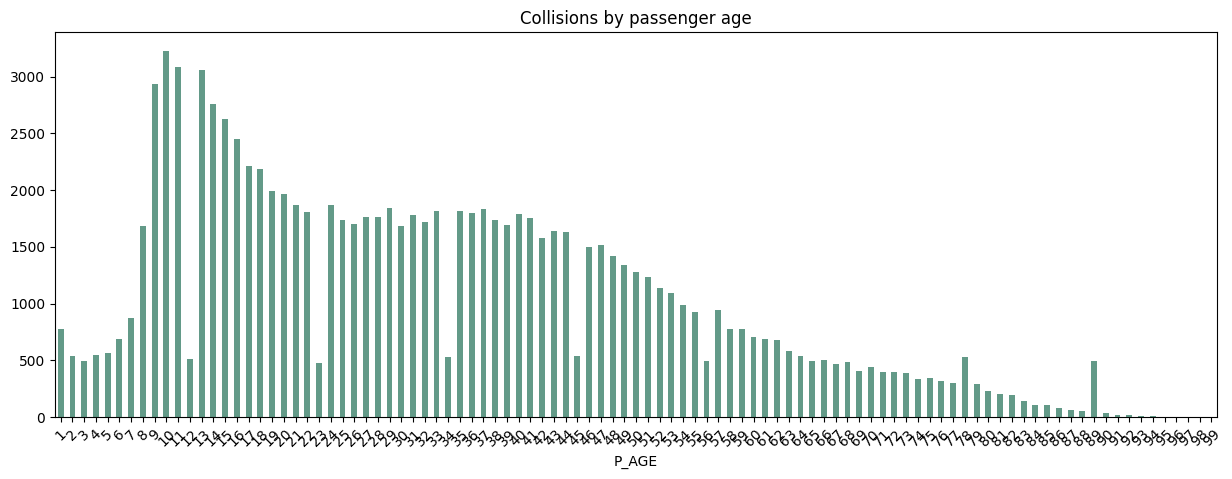

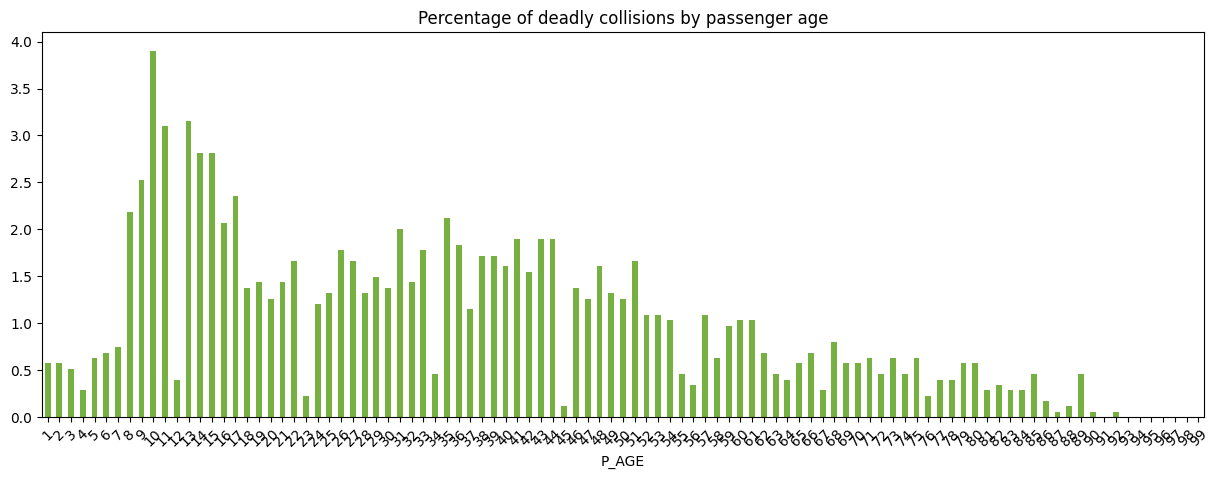

In [ ]:
tipos = sorted(np.int8(data_reducido['P_AGE'].dropna().unique()))
frecuencia("P_AGE", tipos, "Collisions by passenger age",data_reducido)
mortalidadtotal("P_AGE", tipos, "Percentage of deadly collisions by passenger age",data_reducido)

Podemos ver como los jóvenes son más propensos a tener accidentes, esto se explica por el exceso de confianza y la falta de experiencia al volante.

# **Estimación de modelos**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_curve, auc
import matplotlib.pyplot as plt


In [ ]:
x_train = pd.DataFrame(train.drop('FATALITY',axis=1))
x_test = pd.DataFrame(test.drop('FATALITY',axis=1))
y_train = train['FATALITY'].ravel()
y_test = test['FATALITY'].ravel()

Dividimos la muestra en train y test y en variables dependientes e independientes.

## ¿Qué es lo que más contribuye a que existan fallecimientos en un accidente?

Vamos a utilizar el método supervisado del Random Forest.

Este método es uno de los más famosos y con mejor rendimiento para trabajar con conjunto de datos tabulares.

Consiste en una mejora sobre el método de bagging clásico, dónde ahora no sólo se crearán N árboles con N conjunto de muestras aleatorias del df. En cada nodo de decisión de cada árbol, se elegirá solo entre un subconjunto de K variables tomadas de forma aleatoria de entre todo el conjunto de variables.

Esto provoca que los resultados sean mucho más estables, con una ventaja adicional:
debido a que no siempre se elige entre todas las features, el método aprende qué features tienen más relevancia, y ess menos sensible a que exista correlación entre features de entrada.

### Random Forest

In [ ]:
rfc = RandomForestClassifier(max_depth=4, random_state=42, n_estimators=200, max_features='sqrt')
model_rfc= rfc.fit(x_train, y_train)

----
-----
-----

In [ ]:
feature_names = x_train.columns
feature_names

Index(['C_WDAY', 'C_HOUR', 'C_VEHS', 'C_CONF', 'C_RCFG', 'C_WTHR', 'C_RSUR',
       'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE', 'V_YEAR', 'P_ID', 'MALE?',
       'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE', 'P_USER'],
      dtype='object')

In [ ]:
model_rfc.feature_importances_

array([0.01048506, 0.00574631, 0.01620903, 0.02719103, 0.02972367,
       0.00425495, 0.00186818, 0.01175608, 0.02378943, 0.00548558,
       0.01931274, 0.00353736, 0.00555833, 0.00418149, 0.00488943,
       0.01100238, 0.72881235, 0.08236369, 0.00383293])

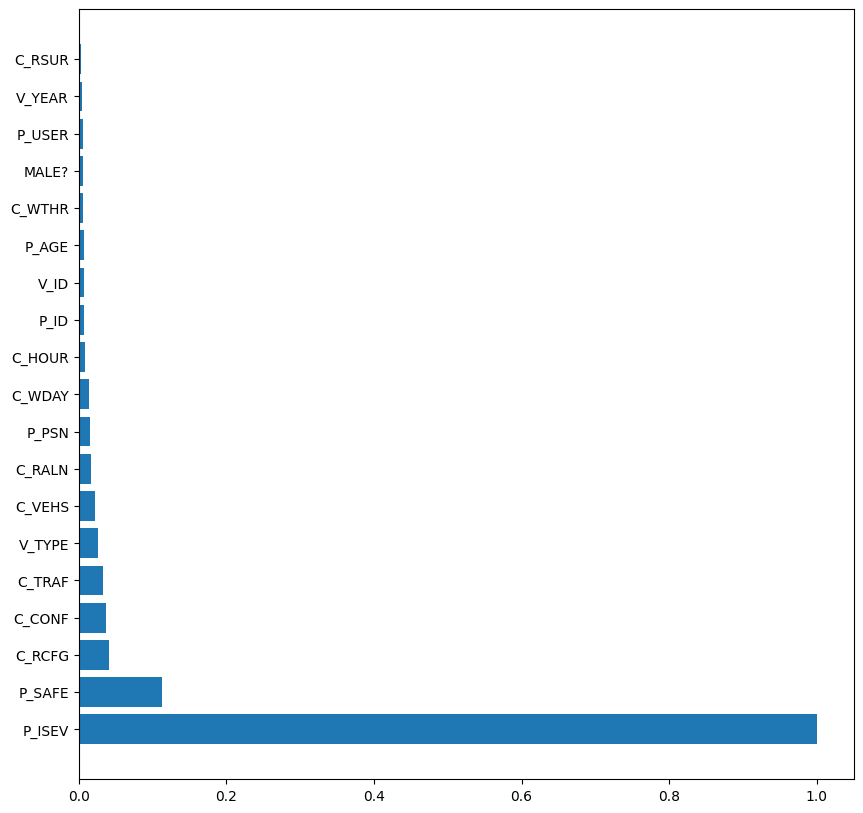

In [ ]:
importances = model_rfc.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(x_train.shape[1]),importances[indices])
plt.yticks(range(x_train.shape[1]),feature_names[indices])


plt.show()

Las variables que más contribuyen a que los accidentados fallezcan son: el tratamiento médico requerido (P_ISEV), el dispositivo de seguridad utilizado (P_SAFE), la configuración de la colisión (C_CONF), el control de tráfico (C_TRAF) y la configuración de la carretera (C_RCFG)

P_ISEV es la variable más representativa porque representa una información muy similar a FATALITY, y guardan una gran correlación.

Por su parte, tiene mucho sentido que contribuyan al número de fallecimientos medidas de precaución como el dispositivo de seguridad utilizado y el control de tráfico.

Dentro de las variables más influyentes, vamos a analizar que categorías de las distintas variables son más propensas a provocar que los accidentados fallezcan

In [ ]:
variables_influyentes= ['P_SAFE','C_CONF','C_TRAF','C_RCFG']

for column in variables_influyentes:
    counts = data_reducido[column].value_counts().sort_values(ascending=False)
    print("Categorías más propensas a accidentes para", column)
    print(counts)
    print()

NameError: ignored

Para visualizar mejor los resultados, vamos a representarlos en porcentajes; es decir: la probabilidad de que el accidentado fallezca en función del valor tomado en las distintas variables.

Esto nos va a facilitar sacar conclusiones.

In [ ]:
P_ISEV= pd.DataFrame(data_reducido['P_ISEV'].value_counts().sort_values(ascending=False))
P_ISEV
total_counts = P_ISEV['P_ISEV'].sum()
P_ISEV['Porcentaje'] = (P_ISEV['P_ISEV'] / total_counts) * 100


def color_negative_red(val):
    color = 'red' if val < 20.00 else 'green'
    return 'color: %s' % color

styled_P_ISEV = P_ISEV.style.format({'Porcentaje': '{:.2f}%'}).applymap(color_negative_red, subset=['Porcentaje'])

styled_P_ISEV

,P_ISEV,Porcentaje
2,53941,52.95%
1,43388,42.59%
N,3499,3.43%
3,681,0.67%
U,361,0.35%


Los pacientes con lesiones son los más propensos a fallecer

In [ ]:
P_SAFE= pd.DataFrame(data_reducido['P_SAFE'].value_counts().sort_values(ascending=False))
P_SAFE
total_counts = P_SAFE['P_SAFE'].sum()
P_SAFE['Porcentaje'] = (P_SAFE['P_SAFE'] / total_counts) * 100


def color_negative_red(val):
    color = 'red' if val < 20.00 else 'green'
    return 'color: %s' % color

styled_P_SAFE = P_SAFE.style.format({'Porcentaje': '{:.2f}%'}).applymap(color_negative_red, subset=['Porcentaje'])

styled_P_SAFE

,P_SAFE,Porcentaje
2,80556,79.08%
UU,7280,7.15%
NN,6670,6.55%
1,2987,2.93%
9,1546,1.52%
13,1496,1.47%
QQ,988,0.97%
12,347,0.34%


Los usuarios que utilizan sistemas de retención infantil tienen más posibilidad de morir. Podemos ver como el cinturón de reguridad logra prevenir un gran número de fallecimientos.

In [ ]:
C_CONF= pd.DataFrame(data_reducido['C_CONF'].value_counts().sort_values(ascending=False))
C_CONF
total_counts = C_CONF['C_CONF'].sum()
C_CONF['Porcentaje'] = (C_CONF['C_CONF'] / total_counts) * 100


def color_negative_red(val):
    color = 'red' if val < 20.00 else 'green'
    return 'color: %s' % color

styled_C_CONF = C_CONF.style.format({'Porcentaje': '{:.2f}%'}).applymap(color_negative_red, subset=['Porcentaje'])

styled_C_CONF

,C_CONF,Porcentaje
3,41012,40.26%
2,40380,39.64%
1,19502,19.14%
4,976,0.96%


Los acccidentes que ocurren entre dos vehículos en movimiento, tanto en diferente dirección como en la misma dirección, son los más propensos a provocar víctimas mortales

In [ ]:
C_TRAF= pd.DataFrame(data_reducido['C_TRAF'].value_counts().sort_values(ascending=False))
C_TRAF
total_counts = C_TRAF['C_TRAF'].sum()
C_TRAF['Porcentaje'] = (C_TRAF['C_TRAF'] / total_counts) * 100


def color_negative_red(val):
    color = 'red' if val < 20.00 else 'green'
    return 'color: %s' % color

styled_C_TRAF = C_TRAF.style.format({'Porcentaje': '{:.2f}%'}).applymap(color_negative_red, subset=['Porcentaje'])

styled_C_TRAF

,C_TRAF,Porcentaje
18,55315,54.30%
1,30788,30.22%
3,12695,12.46%
4,1187,1.17%
6,523,0.51%
8,498,0.49%
2,386,0.38%
13,105,0.10%
5,79,0.08%
15,57,0.06%


Los escenarios donde no hay control de tráfico presente son los más arriesgados

In [ ]:
C_RCFG= pd.DataFrame(data_reducido['C_RCFG'].value_counts().sort_values(ascending=False))
C_RCFG
total_counts = C_RCFG['C_RCFG'].sum()
C_RCFG['Porcentaje'] = (C_RCFG['C_RCFG'] / total_counts) * 100


def color_negative_red(val):
    color = 'red' if val < 20.00 else 'green'
    return 'color: %s' % color

styled_C_RCFG = C_RCFG.style.format({'Porcentaje': '{:.2f}%'}).applymap(color_negative_red, subset=['Porcentaje'])

styled_C_RCFG

,C_RCFG,Porcentaje
2,60034,58.93%
1,40208,39.47%
4,967,0.95%
3,304,0.30%
7,199,0.20%
5,113,0.11%
8,25,0.02%
6,12,0.01%
9,8,0.01%


Los accidentes que ocurren en una intersección de al menos dos vías públicas son los que más peligro tienen de muerte

## ¿Qué tipos de vehículos (modelos, antigüedad, etc.) y conductores son más propensos a tener accidentes (acción correctiva en prima)?

In [ ]:
V_TYPE= pd.DataFrame(data_reducido['V_TYPE'].value_counts().sort_values(ascending=False))
V_TYPE
total_counts = V_TYPE['V_TYPE'].sum()
V_TYPE['Porcentaje'] = (V_TYPE['V_TYPE'] / total_counts) * 100


def color_negative_red(val):
    color = 'red' if val < 20.00 else 'green'
    return 'color: %s' % color

styled_V_TYPE = V_TYPE.style.format({'Porcentaje': '{:.2f}%'}).applymap(color_negative_red, subset=['Porcentaje'])

styled_V_TYPE

,V_TYPE,Porcentaje
1,89278,87.64%
6,3096,3.04%
14,2169,2.13%
17,1521,1.49%
7,1457,1.43%
8,1325,1.30%
5,1231,1.21%
11,939,0.92%
9,382,0.37%
16,137,0.13%


El vehículo más propenso de provocar víctimas mortales es el **vehículo ligero:** automóvil de pasajeros, furgoneta de pasajeros, vehículos utilitarios ligeros y camionetas pick-up livianas.

Este vehículo es sin duda el más arriesgado con una probabilidad del 82%. No obstante, es importante tener en cuenta que es el tipo de vehículo más utilizado y, por tanto, el que más muertes causa

In [ ]:
V_YEAR= pd.DataFrame(data_reducido['V_YEAR'].value_counts().sort_values(ascending=False))
V_YEAR
total_counts = V_YEAR['V_YEAR'].sum()
V_YEAR['Porcentaje'] = (V_YEAR['V_YEAR'] / total_counts) * 100


def color_negative_red(val):
    color = 'red' if val < 20.00 else 'green'
    return 'color: %s' % color

styled_V_YEAR = V_YEAR.style.format({'Porcentaje': '{:.2f}%'}).applymap(color_negative_red, subset=['Porcentaje'])

styled_V_YEAR

,V_YEAR,Porcentaje
2000,6180,6.07%
2002,5581,5.48%
1999,5552,5.45%
1998,5507,5.41%
2001,5235,5.14%
2003,5228,5.13%
1997,5080,4.99%
1995,4234,4.16%
2004,4232,4.15%
2005,4160,4.08%


En cuánto a los años de los vehículo, no hay ninguno que destaque por haber sufrido más accidentes. No obstante vemos una evolución decreciente en el número de víctimas mortales a lo largo de los años. Esto se explica por el esfuerzo de los fabricantes de vehículos de hacer modelos cada vez más seguros y equiparados con diapositivos de seguridad que aumentan la probabilidad de supervivencia en caso de accidentes.

Text(0, 0.5, 'Number of deadly colissions')

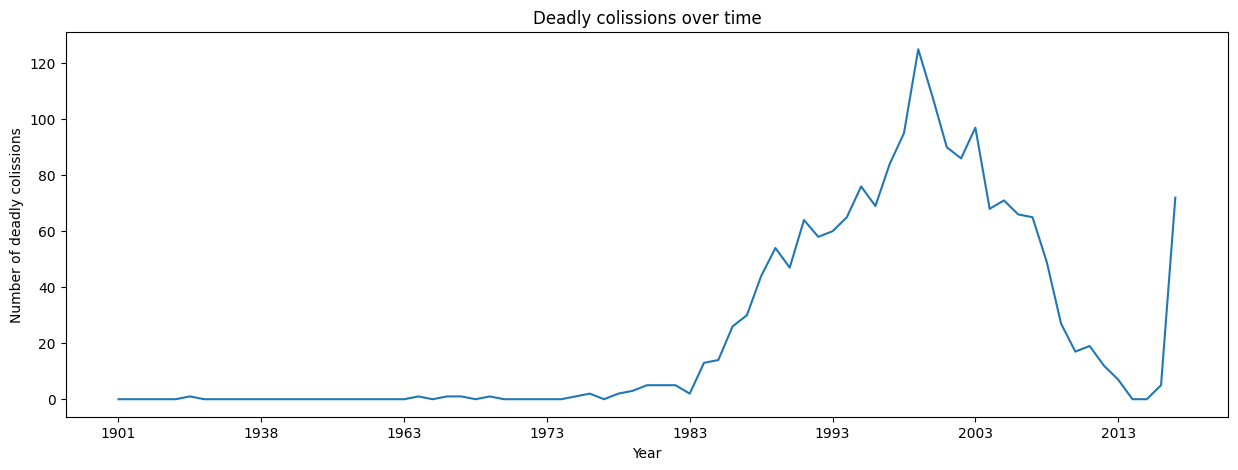

In [ ]:
time_collision_fatal = data_reducido.groupby('V_YEAR')["FATALITY"].sum()
plot = time_collision_fatal.plot(figsize = (15,5), title = "Deadly colissions by year of vehicle")
plot.set_xlabel("Year")
plot.set_ylabel("Number of deadly colissions")

En el caso de que dispusiésemos de la información con respecto a la cantidad de vehiculos en circulación segmentados segun el año de fabricación podríamos determinar con seguridad la relevancia del año de creación con respecto el número de accidentes. Al no ser el caso, llegamos a la conclusión de que un mayor número de accidentes con vehículos fabricados entre 1995 y 2005 es a consecuencia a la mayor circulación de estos vehículos. 

## ¿Qué tipos de vehículos (modelos, antigüedad, etc.) son menos propensos a tener accidentes (descuento en prima)?

La inversa a la pregunta anterior.


En el caso del tipo de vehículos, los menos propensos a provocar accidentes mortales son el minibus escolar y el camión de bomberos. Estos vehículos están especialmente protegidos por los servicios tan importantes que realizan. Asimismo cuentan con normas de tráfico especiales que reducen al máximo el riesgo de accidente mortal.

Por otro lado, tampoco hay un año que destaque por el reducido número de accidentes mortales de conducción, pero estos se reducen a lo largo del tiempo.

## Regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_fscore_support
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
logistic_model = LogisticRegression()

In [ ]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
predictions_prob = logistic_model.predict_proba(x_test)[:,1]
predictions_rl = logistic_model.predict(x_test)

In [ ]:
results_lr_df = (test
    .assign(predicted_prob=predictions_prob)
    .assign(predicted_fatality=predictions_rl)
    .loc[:,['FATALITY','predicted_prob','predicted_fatality']]

)

In [ ]:
results_lr_df.head(10)

,FATALITY,predicted_prob,predicted_fatality
DATE,,,
2003-02-01,0,0.010024,0
2007-01-01,0,0.012264,0
2003-04-01,0,0.009418,0
2009-05-01,0,0.010168,0
2001-06-01,0,0.010456,0
2007-08-01,0,0.011380,0
2002-04-01,0,0.009777,0
2008-02-01,0,0.009905,0
2000-05-01,0,0.010156,0


In [ ]:
score_rl = logistic_model.score(x_test, y_test)
print("\nScore:")
print(score_rl)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_rl = mean_squared_error(results_lr_df['FATALITY'], results_lr_df['predicted_fatality'], squared=False)
print("\nMean_squared_eror:")
print(rmse_rl)

0.09958744370014014

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_lr = accuracy_score(
    results_lr_df['FATALITY'],
    results_lr_df['predicted_fatality']
)
print('\nAccuracy')
print(accuracy_lr)

0.9900823410572714

In [ ]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, predictions_rl))
print("\nReporte de clasificación:")
print(classification_report(y_test, predictions_rl))

Matriz de confusión:
[[32125     0]
 [  324   220]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     32125
           1       1.00      0.40      0.58       544

    accuracy                           0.99     32669
   macro avg       1.00      0.70      0.79     32669
weighted avg       0.99      0.99      0.99     32669



In [ ]:
precision, recall, f_score, _ = precision_recall_fscore_support(y_test, predictions_rl, average='micro')
print("\nF-score:")
print(f_score)


F-score:
0.9900823410572714


## Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtree2 = DecisionTreeRegressor(max_depth=6)

In [ ]:
dtree2.fit(x_train, y_train)
dtree2.score(x_train, y_train)

0.4185819875436615

In [ ]:
predictions_dtree = dtree2.predict(x_test)

In [ ]:
results_dtree = (test
    .loc[:,['FATALITY']]
    .assign(Predicted=predictions_dtree)
    .assign(SquaredError=lambda x:(x.FATALITY - x.Predicted)**2)
)

In [ ]:
results_dtree.head(10)

,FATALITY,Predicted,SquaredError
DATE,,,
1999-02-01,0,0.007981,0.000064
2008-06-01,0,0.005977,0.000036
2004-02-01,0,0.005977,0.000036
2000-10-01,0,0.007981,0.000064
2002-08-01,0,0.005977,0.000036
2000-08-01,0,0.014665,0.000215
2005-06-01,0,0.005977,0.000036
2000-10-01,0,0.007981,0.000064
2006-04-01,0,0.014665,0.000215


In [ ]:
rmse_tree = mean_squared_error(results_dtree['FATALITY'], results_dtree['Predicted'], squared=False)
rmse_tree

0.1042693313658742

# Dado un accidente, ¿se puede generar un modelo que prediga si habrá fallecimientos o no? ¿Si se va a necesitar tratamiento médico o no? Las aseguradoras tienen que inmovilizar capital para pagar estas casuísticas. 

Para estimar este modelo hemos optado por utilizan un Gradient Boosting Classsifier.

En vez de crear una versión nueva de boosting para cada tipo de función de pérdida, gradient boost optimiza el conjunto de weak learners en todo el espacio de funciones haciendo uso del gradiente descendiente, al igual que en la redes neuronales

## GradientBoost con Fatality

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
model_scaler = StandardScaler().fit(x_train)

x_train_scaled = pd.DataFrame(model_scaler.transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(model_scaler.transform(x_test), columns=x_test.columns)

In [ ]:
gbc = GradientBoostingClassifier(max_depth=5, random_state=42)

In [ ]:
model_gbc= gbc.fit(x_train_scaled, y_train)

Entrenamos el modelo con el conjunto de datos de entrenamiento

In [ ]:
train_accuracy6= model_gbc.score(x_train, y_train)

print("Accuracy en entrenamiento: {:.2f}%".format(train_accuracy6 * 100))

Accuracy en entrenamiento: 98.27%


Vemos el accuracy o score en entrenamiento

In [ ]:
predictions_prob = model_gbc.predict_proba(x_test_scaled)[:,1]
predictions = model_gbc.predict(x_test_scaled)

In [ ]:
x_test

,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,MALE?,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
DATE,,,,,,,,,,,,,,,,,,,
1999-02-01,0.013874,0.040789,0.028263,0.030145,0.008779,0.017098,0.011410,0.013643,0.025233,0.018253,0.014967,0.014740,0.015846,0.020025,0.007487,0.015881,0.011846,0.012652,0.015323
2008-06-01,0.012871,0.014355,0.013655,0.007196,0.029101,0.016789,0.017413,0.014338,0.002138,0.016636,0.015841,0.004329,0.014626,0.014567,0.012117,0.014546,0.011752,0.011714,0.014426
2004-02-01,0.015958,0.014508,0.013298,0.005818,0.028971,0.016411,0.017411,0.013733,0.024760,0.014985,0.014807,0.016049,0.016090,0.020601,0.022154,0.016091,0.012500,0.013040,0.015493
2000-10-01,0.024401,0.015240,0.014385,0.005847,0.009198,0.016439,0.017287,0.034764,0.017244,0.018881,0.014817,0.013115,0.017612,0.012648,0.006507,0.018032,0.008173,0.012960,0.019491
2002-08-01,0.016298,0.021780,0.014003,0.006282,0.028824,0.020408,0.017366,0.013655,0.025128,0.014464,0.041737,0.014845,0.019050,0.012194,0.013024,0.017788,0.012383,0.038708,0.020226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-11-01,0.015623,0.014850,0.014273,0.006299,0.029751,0.016614,0.012516,0.019120,0.025558,0.014536,0.015096,0.018279,0.017902,0.012482,0.011534,0.017890,0.008269,0.013089,0.020330
2004-03-01,0.015993,0.014095,0.002443,0.006757,0.029552,0.029902,0.014883,0.039338,0.025112,0.016088,0.015241,0.021972,0.016293,0.020271,0.018124,0.016326,0.011896,0.012735,0.015918
2007-01-01,0.014358,0.013624,0.012222,0.017930,0.009035,0.015527,0.016337,0.018290,0.002087,0.016363,0.013406,0.022695,0.020898,0.010069,0.013209,0.023079,0.009665,0.012173,0.023874


In [ ]:
results_gbc_df = (test
    .assign(predicted_prob=predictions_prob)
    .assign(predicted_status=predictions)
    .loc[:,['FATALITY','predicted_prob','predicted_status']])

results_gbc_df.head()

,FATALITY,predicted_prob,predicted_status
DATE,,,
1999-02-01,0,0.007310,0
2008-06-01,0,0.001162,0
2004-02-01,0,0.006270,0
2000-10-01,0,0.003137,0
2002-08-01,0,0.012263,0


Extraemos tanto las predicciones, como sus probabilidades

### ACCURACY

In [ ]:
accuracy_gbc = accuracy_score(
    results_gbc_df['FATALITY'],
    results_gbc_df['predicted_status'])

print("Accuracy en prueba: {:.2f}%".format(accuracy_gbc * 100))

Accuracy en prueba: 98.73%


### PRECISION

In [ ]:
precision_score_gbc = precision_score(
    results_gbc_df['FATALITY'],
    results_gbc_df['predicted_status'])

print("Precision en datos de prueba: {:.2f}%".format(precision_score_gbc * 100))

Precision en datos de prueba: 75.67%


### RECALL

In [ ]:
recall_score_gbc = recall_score(
    results_gbc_df['FATALITY'],
    results_gbc_df['predicted_status'])

print("Recall en datos de prueba: {:.2f}%".format(recall_score_gbc * 100))

Recall en datos de prueba: 38.05%


### CONFUSION MATRIX

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
   
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.show()

In [ ]:
confusion_gbc = confusion_matrix(
    results_gbc_df['FATALITY'],
    results_gbc_df['predicted_status'])

print("Matriz de confusión en datos de prueba:\n", confusion_gbc)

Matriz de confusión en datos de prueba:
 [[29974    64]
 [  324   199]]


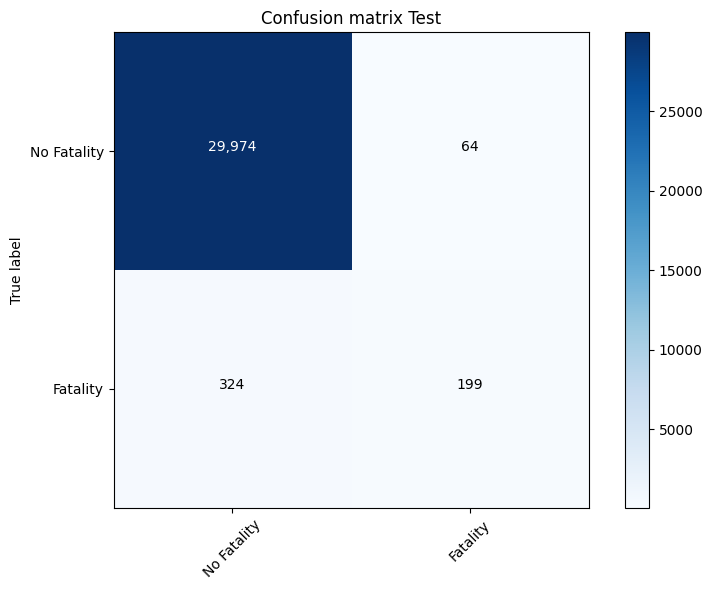

In [ ]:
import itertools

plot_confusion_matrix(confusion_gbc, target_names=['No Fatality','Fatality'],
                      title='Confusion matrix Test',
                      cmap=None, normalize=False)

Cada columna de la matriz representa el número de predicciones de cada clase, y cada fila las instancias en la clase real.

Como podemos ver la tasa de verdaderos positivos es muy alta, esto es un buen indicador de la predicción del modelo.

### F1 SCORE

In [ ]:
f1_score_gbc = f1_score(
    results_gbc_df['FATALITY'],
    results_gbc_df['predicted_status'])

print("Puntuación F1 en datos de prueba: {:.2f}%".format(f1_score_gbc * 100))

Puntuación F1 en datos de prueba: 50.64%


### CURVA ROC

In [ ]:
def plot_roc_gini(y_true=None,y_pred=None, size_figure=[9,9], tittle = 'Curva Roc'):

    if ((y_true is None) or (y_pred is None)):
        print(u'\nFaltan parámetros por pasar a la función')
        return 1

    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=size_figure)
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.00])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(tittle)
    plt.legend(loc="lower right")
    plt.show()

    gini = (2.0 * roc_auc) - 1.0

    print('\n*************************************************************')
    print(u'\nEl coeficiente de GINI es: %0.2f' % gini)
    print(u'\nEl área por debajo de la curva ROC es: %0.2f' %roc_auc)
    print('\n*************************************************************')

    return 0

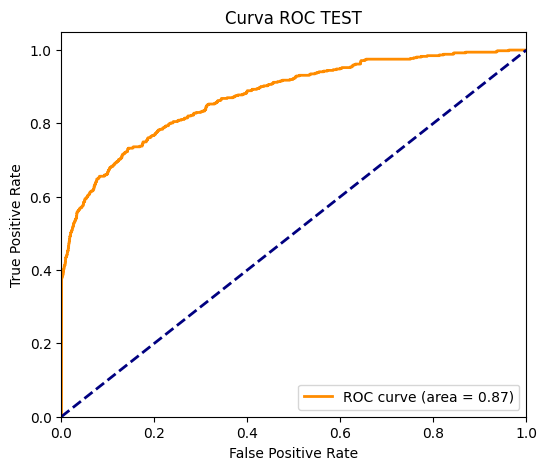


*************************************************************

El coeficiente de GINI es: 0.75

El área por debajo de la curva ROC es: 0.87

*************************************************************


0

In [ ]:
plot_roc_gini(y_test, predictions_prob, size_figure=[6,5], tittle = 'Curva ROC TEST')

La curva ROC es una representación de la tasa de verdaderos positivos (TP) frente a la de falsos positivos (FP) según va variando el umbral.
Cuanto mayor sea el área debajo de la curva (AUC) mejor es el algoritmo (idealmente 1). Por tanto, que el AUC sea de 0.87 es muy buen indicador.


### AREA BAJO LA CURVA

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score_gbc = roc_auc_score(
    results_gbc_df['FATALITY'],
    results_gbc_df['predicted_prob'])

print("Área bajo la curva ROC en datos de prueba: {:.2f}%".format(roc_auc_score_gbc * 100))

Área bajo la curva ROC en datos de prueba: 87.35%


### RESULTADOS EN GENERAL

En esta sección, resumimos los resultados de las métricas de evaluación

In [ ]:
models = ['GradientBoost']
accuracies = [ accuracy_gbc]
precisions = [precision_score_gbc]
recalls = [recall_score_gbc]
conf_matrix= [confusion_gbc]
f1_score= [f1_score_gbc]
aucs = [roc_auc_score_gbc]


comparative_df = pd.DataFrame(
    {'Model':models, 
    'Accuracy':accuracies,
    'Precision':precisions,
    'Recall':recalls,
    'Confusion_matrix': conf_matrix,
    'F1_score': f1_score,
    'AUC':aucs
    })

comparative_df.head()

,Model,Accuracy,Precision,Recall,Confusion_matrix,F1_score,AUC
0,GradientBoost,0.987304,0.756654,0.380497,"[[29974, 64], [324, 199]]",0.506361,0.873545


---
---
---

## GradientBoost con P_ISEV

In [ ]:
data_reducido= data_reducido.replace({'P_ISEV' : {'1' : 1, '2' : 2}})


In [ ]:
data_reducido['P_ISEV']=data_reducido['P_ISEV'].replace(['3','N','U'],3)

In [ ]:
data_reducido['P_ISEV'].value_counts()

2    53941
1    43388
3     4541
Name: P_ISEV, dtype: int64

In [ ]:
df_target2=data_reducido.loc[:,['P_ISEV']]

In [ ]:
df_features2 = data_reducido.drop('P_ISEV', axis=1)

df_features2.columns

Index(['C_WDAY', 'C_HOUR', 'FATALITY', 'C_VEHS', 'C_CONF', 'C_RCFG', 'C_WTHR',
       'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE', 'V_YEAR', 'P_ID',
       'MALE?', 'P_AGE', 'P_PSN', 'P_SAFE', 'P_USER'],
      dtype='object')

In [ ]:
cbe2 = ce.CatBoostEncoder(cols=df_features2.columns)
categoricas_transformed2= cbe2.fit_transform(df_features2,df_target2)
categoricas_transformed2

,C_WDAY,C_HOUR,FATALITY,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,MALE?,P_AGE,P_PSN,P_SAFE,P_USER
DATE,,,,,,,,,,,,,,,,,,,
2000-09-01,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661
2010-08-01,1.618661,1.618661,1.809331,1.618661,1.618661,1.618661,1.809331,1.618661,1.618661,1.618661,1.809331,1.809331,1.618661,1.618661,1.618661,1.618661,1.618661,1.809331,1.618661
2003-06-01,1.618661,1.309331,1.539554,1.809331,1.309331,1.309331,1.539554,1.809331,1.309331,1.309331,1.618661,1.539554,1.618661,1.809331,1.809331,1.618661,1.809331,1.539554,1.809331
2014-07-01,1.618661,1.809331,1.654665,1.872887,1.618661,1.809331,1.618661,1.872887,1.618661,1.809331,1.809331,1.654665,1.618661,1.872887,1.872887,1.618661,1.872887,1.654665,1.872887
2005-03-01,1.809331,1.618661,1.723732,1.309331,1.539554,1.539554,1.654665,1.904665,1.809331,1.539554,1.539554,1.723732,1.618661,1.618661,1.904665,1.618661,1.309331,1.723732,1.309331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-06-01,1.621957,1.594664,1.608552,1.535857,1.551641,1.684399,1.598641,1.606841,1.599424,1.664858,1.442583,1.615846,1.600389,1.640024,1.579772,1.653003,1.637716,1.500291,1.622376
2006-07-01,1.621915,1.618283,1.608546,1.605258,1.551628,1.684382,1.598633,1.606832,1.599417,1.664846,1.655228,1.615839,1.623918,1.640015,1.579762,1.633176,1.637707,1.558334,1.622367
2014-01-01,1.609635,1.618295,1.608549,1.605264,1.551639,1.571722,1.598639,1.705416,1.599422,1.548156,1.655237,1.615843,1.577062,1.640020,1.669170,1.587711,1.637712,1.558340,1.622373


In [ ]:
lista_transformed2= list(categoricas_transformed2.columns)
lista_transformed2

['C_WDAY',
 'C_HOUR',
 'FATALITY',
 'C_VEHS',
 'C_CONF',
 'C_RCFG',
 'C_WTHR',
 'C_RSUR',
 'C_RALN',
 'C_TRAF',
 'V_ID',
 'V_TYPE',
 'V_YEAR',
 'P_ID',
 'MALE?',
 'P_AGE',
 'P_PSN',
 'P_SAFE',
 'P_USER']

In [ ]:
df_def2 = data_reducido.copy()

df_def2.loc[:, lista_transformed2] = categoricas_transformed2.loc[:, lista_transformed2]
df_def2

<ipython-input-74-b1ef2c5194c3>:3: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



,C_WDAY,C_HOUR,FATALITY,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,MALE?,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
DATE,,,,,,,,,,,,,,,,,,,,
2000-09-01,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,1.618661,2,1.618661,1.618661
2010-08-01,1.618661,1.618661,1.809331,1.618661,1.618661,1.618661,1.809331,1.618661,1.618661,1.618661,1.809331,1.809331,1.618661,1.618661,1.618661,1.618661,1.618661,1,1.809331,1.618661
2003-06-01,1.618661,1.309331,1.539554,1.809331,1.309331,1.309331,1.539554,1.809331,1.309331,1.309331,1.618661,1.539554,1.618661,1.809331,1.809331,1.618661,1.809331,2,1.539554,1.809331
2014-07-01,1.618661,1.809331,1.654665,1.872887,1.618661,1.809331,1.618661,1.872887,1.618661,1.809331,1.809331,1.654665,1.618661,1.872887,1.872887,1.618661,1.872887,2,1.654665,1.872887
2005-03-01,1.809331,1.618661,1.723732,1.309331,1.539554,1.539554,1.654665,1.904665,1.809331,1.539554,1.539554,1.723732,1.618661,1.618661,1.904665,1.618661,1.309331,2,1.723732,1.309331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-06-01,1.621957,1.594664,1.608552,1.535857,1.551641,1.684399,1.598641,1.606841,1.599424,1.664858,1.442583,1.615846,1.600389,1.640024,1.579772,1.653003,1.637716,1,1.500291,1.622376
2006-07-01,1.621915,1.618283,1.608546,1.605258,1.551628,1.684382,1.598633,1.606832,1.599417,1.664846,1.655228,1.615839,1.623918,1.640015,1.579762,1.633176,1.637707,2,1.558334,1.622367
2014-01-01,1.609635,1.618295,1.608549,1.605264,1.551639,1.571722,1.598639,1.705416,1.599422,1.548156,1.655237,1.615843,1.577062,1.640020,1.669170,1.587711,1.637712,2,1.558340,1.622373


In [ ]:
train2, test2 = train_test_split(df_def2, test_size=0.3,random_state=0, stratify= df_def2[['P_ISEV']])

In [ ]:
x_train2 = pd.DataFrame(train2.drop('P_ISEV',axis=1))
x_test2 = pd.DataFrame(test2.drop('P_ISEV',axis=1))
y_train2 = train2['P_ISEV'].ravel()
y_test2 = test2['P_ISEV'].ravel()

In [ ]:
x_train2.columns

Index(['C_WDAY', 'C_HOUR', 'FATALITY', 'C_VEHS', 'C_CONF', 'C_RCFG', 'C_WTHR',
       'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE', 'V_YEAR', 'P_ID',
       'MALE?', 'P_AGE', 'P_PSN', 'P_SAFE', 'P_USER'],
      dtype='object')

In [ ]:
x_test2.columns

Index(['C_WDAY', 'C_HOUR', 'FATALITY', 'C_VEHS', 'C_CONF', 'C_RCFG', 'C_WTHR',
       'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE', 'V_YEAR', 'P_ID',
       'MALE?', 'P_AGE', 'P_PSN', 'P_SAFE', 'P_USER'],
      dtype='object')

In [ ]:
model_scaler2 = StandardScaler().fit(x_train2)

x_train_scaled2 = pd.DataFrame(model_scaler2.transform(x_train2), columns=x_train2.columns)
x_test_scaled2 = pd.DataFrame(model_scaler2.transform(x_test2), columns=x_test2.columns)

In [ ]:
gbc2 = GradientBoostingClassifier(max_depth=5, random_state=42)

In [ ]:
model_gbc2= gbc2.fit(x_train_scaled2, y_train2)

Entrenamos el modelo con el conjunto de datos de entrenamiento. Tarda alrededor de 3 minutos y 10 segundos


In [ ]:
train_accuracy2= model_gbc2.score(x_train2, y_train2)

print("Accuracy en entrenamiento: {:.2f}%".format(train_accuracy2 * 100))

Accuracy en entrenamiento: 53.25%


Vemos el accuracy o score en entrenamiento

In [ ]:
predictions_prob2 = model_gbc2.predict_proba(x_test_scaled2)[:,1]
predictions2 = model_gbc2.predict(x_test_scaled2)

In [ ]:
results_gbc_df2 = (test2
    .assign(predicted_prob=predictions_prob2)
    .assign(predicted_status=predictions2)
    .loc[:,['P_ISEV','predicted_prob','predicted_status']])

results_gbc_df2.head()

,P_ISEV,predicted_prob,predicted_status
DATE,,,
2000-12-01,1,0.583205,2
2007-01-01,2,0.727267,2
2003-03-01,2,0.686519,2
2013-06-01,1,0.562743,2
2007-10-01,1,0.648476,2


Extraemos tanto las predicciones, como sus probabilidades

### ACCURACY

In [ ]:
accuracy_gbc2 = accuracy_score(
    results_gbc_df2['P_ISEV'],
    results_gbc_df2['predicted_status'])

print("Accuracy en prueba: {:.2f}%".format(accuracy_gbc2 * 100))

Accuracy en prueba: 69.97%


### PRECISION

In [ ]:
precision_score_gbc2 = precision_score(
    results_gbc_df2['P_ISEV'],
    results_gbc_df2['predicted_status'],average='weighted')

print("Precision en datos de prueba: {:.2f}%".format(precision_score_gbc2 * 100))

Precision en datos de prueba: 69.61%


### RECALL

In [ ]:
recall_score_gbc2 = recall_score(
    results_gbc_df2['P_ISEV'],
    results_gbc_df2['predicted_status'], average='weighted')

print("Recall en datos de prueba: {:.2f}%".format(recall_score_gbc2 * 100))

Recall en datos de prueba: 69.97%


### CONFUSION MATRIX

In [ ]:
confusion_gbc2 = confusion_matrix(
    results_gbc_df2['P_ISEV'],
    results_gbc_df2['predicted_status'])

print("Matriz de confusión en datos de prueba:\n", confusion_gbc2)

Matriz de confusión en datos de prueba:
 [[ 8258  6106   577]
 [ 3917 15338    95]
 [  226   122  2133]]


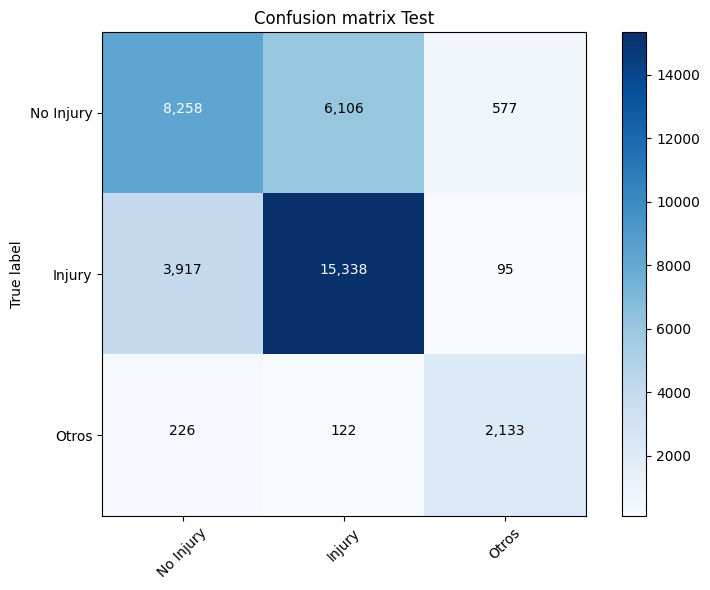

In [ ]:
import itertools

plot_confusion_matrix(confusion_gbc2, target_names=['No Injury','Injury','Otros'],
                      title='Confusion matrix Test',
                      cmap=None, normalize=False)

In [ ]:
test2['P_ISEV'].value_counts()

2    19350
1    14941
3     2481
Name: P_ISEV, dtype: int64

### F1 SCORE

In [ ]:
f1_score_gbc2 = f1_score(
    results_gbc_df2['P_ISEV'],
    results_gbc_df2['predicted_status'], average='weighted' )

print("Puntuación F1 en datos de prueba: {:.2f}%".format(f1_score_gbc2 * 100))

Puntuación F1 en datos de prueba: 69.44%


### RESULTADOS EN GENERAL

In [ ]:
models = ['GradientBoost']
accuracies = [ accuracy_gbc2]
precisions = [precision_score_gbc2]
recalls = [recall_score_gbc2]
conf_matrix= [confusion_gbc2]
f1_score= [f1_score_gbc2]



comparative_df2 = pd.DataFrame(
    {'Model':models, 
    'Accuracy':accuracies,
    'Precision':precisions,
    'Recall':recalls,
    'Confusion_matrix': conf_matrix,
    'F1_score': f1_score
    })

comparative_df2.head()

,Model,Accuracy,Precision,Recall,Confusion_matrix,F1_score
0,GradientBoost,0.69969,0.696127,0.69969,"[[8258, 6106, 577], [3917, 15338, 95], [226, 1...",0.694406
